# <font color='blue'>Problema de Análise da Eficiência do Transporte Ferroviário e Identificação de Oportunidades de Melhoria</font>

# 1 - Definindo o problema de negócio

### Analisar a eficiência do transporte ferroviário, identificar padrões de transporte e sugerir oportunidades de melhoria nas operações ferroviárias.


# 2 - Decisões

### O problema de negócio necessita de análise de dados. Vamos utilizar ferramentas por código e elaborar gráficos de diferentes formas para entender os dados e poder sugerir melhorias.

# 3 - Versão python e import dos pacotes utilizados

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.4


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import glob
import os
import subprocess
import statsmodels.api as sm
from jupyter_dash import JupyterDash
from dash import html, dcc
from IPython.display import FileLink, IFrame, Image, display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from datetime import datetime
from dateutil.parser import parse
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Danilo Temerloglou de Abreu" --iversions

Author: Danilo Temerloglou de Abreu

matplotlib : 3.8.4
numpy      : 1.26.4
chardet    : 4.0.0
seaborn    : 0.13.2
pandas     : 2.2.2
statsmodels: 0.14.2
dash       : 2.17.1



# 4 - Dicionário de dados

In [5]:
#mes_ano - Data MM_AA Ano mês de referência.
#ferrovia - Concessionária responsável pelo fluxo.
#mercadoria_antt - Mercadoria transportada.
#estacao_origem - Sigla da estação de Origem.
#uf_origem - Unidade Federativa de Origem.
#estacao_destino - Sigla da estação de Destino.
#uf_destino - Unidade Federativa de Destino.
#tu - Toneladas.
#tku - Tonelada-Km Útil 

# 5 - Carregando e Salvando o Conjunto de dados

In [6]:
# Diretório onde os arquivos CSV estão localizados
diretorio = r'C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\data\raw'

# Padrão de busca para arquivos CSV
padrao = os.path.join(diretorio, 'producao_origem_destino_*.csv')

# Encontrar todos os arquivos CSV que correspondem ao padrão
arquivos_csv = glob.glob(padrao)

# Lista para armazenar os DataFrames individuais
dataframes = []

# Função para detectar codificação e ler arquivo CSV
def ler_csv_com_codificacao(arquivo):
    # Detectar a codificação do arquivo
    with open(arquivo, 'rb') as f:
        resultado = chardet.detect(f.read())
    codificacao = resultado['encoding']
    print(f"Lendo {arquivo} com codificação {codificacao}")
    
    # Ler o arquivo CSV com a codificação detectada
    return pd.read_csv(arquivo, encoding=codificacao, delimiter=';')

# Ler cada arquivo CSV e adicioná-lo à lista de DataFrames
for arquivo in arquivos_csv:
    try:
        df = ler_csv_com_codificacao(arquivo)
        dataframes.append(df)
    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Concatenar todos os DataFrames em um único DataFrame
df_combinado = pd.concat(dataframes, ignore_index=True)

Lendo C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\data\raw\producao_origem_destino_2013.csv com codificação ISO-8859-1
Lendo C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\data\raw\producao_origem_destino_2014.csv com codificação ISO-8859-1
Lendo C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\data\raw\producao_origem_destino_2015.csv com codificação ISO-8859-1
Lendo C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\data\raw\producao_origem_destino_2016.csv com codificação ISO-8859-1
Lendo C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\data\raw\producao_origem_destino_2017.csv com codificação ISO-8859-1
Lendo C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\data\raw\producao_origem_destino_2018.csv com codificação ISO-8859-1
Lendo C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\data\raw\producao_origem_destino_2019.csv com codificação ISO-8859-1
Lendo C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\data\raw\producao_origem_destino_2020.csv com codificação ISO-8859-1


In [7]:
# Caminho completo para o diretório 'data/processed'
caminho_pickle = 'C:/Users/Danilo/PROJETOS/PROJETO11_FERROVIA_CARGA/data/joined/df_combinado.pkl'

# Salvar o DataFrame em um arquivo pickle
df_combinado.to_pickle(caminho_pickle)

print(f"DataFrame salvo em {caminho_pickle}")

DataFrame salvo em C:/Users/Danilo/PROJETOS/PROJETO11_FERROVIA_CARGA/data/joined/df_combinado.pkl


# 6 - Carregando o Conjunto de dados completo já persistido

In [8]:
# Caminho para o arquivo pickle
caminho_pickle = 'C:/Users/Danilo/PROJETOS/PROJETO11_FERROVIA_CARGA/data/joined/df_combinado.pkl'

# Carregar o DataFrame a partir do arquivo pickle
df = pd.read_pickle(caminho_pickle)

print("DataFrame carregado")

DataFrame carregado


In [9]:
# salvando localmente os dados em uma única tabela excel
df.to_excel('C:\\Users\\Danilo\\PROJETOS\\PROJETO11_FERROVIA_CARGA\\data\\joined\\producao_origem_destino_2013_2023.xlsx', index=False, engine='openpyxl')

# 7 - EDA Análise Exploratória de Dados

In [10]:
# Shape
df.shape

(83599, 9)

In [11]:
#nomes das colunas
df.columns

Index(['Mes_Ano', 'Ferrovia', 'Mercadoria_ANTT', 'Estacao_Origem', 'UF_Origem',
       'Estacao_Destino', 'UF_Destino', 'TU', 'TKU'],
      dtype='object')

In [12]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83599 entries, 0 to 83598
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes_Ano          83599 non-null  object
 1   Ferrovia         83599 non-null  object
 2   Mercadoria_ANTT  83599 non-null  object
 3   Estacao_Origem   83599 non-null  object
 4   UF_Origem        83599 non-null  object
 5   Estacao_Destino  83599 non-null  object
 6   UF_Destino       83599 non-null  object
 7   TU               83599 non-null  object
 8   TKU              83599 non-null  object
dtypes: object(9)
memory usage: 5.7+ MB


In [13]:
# Amostra
df.sample(5)

,Mes_Ano,Ferrovia,Mercadoria_ANTT,Estacao_Origem,UF_Origem,Estacao_Destino,UF_Destino,TU,TKU
69782,04/2022,FCA,Enxofre,Estação TUF,SP,Valefertil,MG,82.553,57.370.369
38791,05/2018,EFC,Minério de Ferro,Serra Leste,PA,Ponta da Madeira,MA,327.492,272.257.854
30528,03/2017,EFVM,Prd. Siderúrgicos - Bobina - BF,Intendente Câmara,MG,Lafaiete Bandeira,MG,44.415,9.894.103
74761,11/2022,MRS,Prd. Siderúrgicos - Bobina - BQ,Nova Granja,MG,Barbará,RJ,4.094,2.038.799
47618,06/2019,MRS,Contêiner Cheio de 20 Pés,Conceiçãozinha,SP,Paulínia,SP,1.070,213.550


### 7.1 - Ajustando tipos de variáveis e verificando valores únicos

In [14]:
#agora vamos corrigir os tipos de variáveis
df['Mes_Ano'] = pd.to_datetime(df['Mes_Ano'], format='%m/%Y')
# Remover pontos usados como separadores de milhar
df['TU'] = df['TU'].str.replace('.', '', regex=False)
df['TU'] = df['TU'].astype(float)
# Remover pontos usados como separadores de milhar
df['TKU'] = df['TKU'].str.replace('.', '', regex=False)
df['TKU'] = df['TKU'].astype(float)

In [15]:
# Vamos ver os valores únicos para descobrir se temos outros problemas

In [16]:
df['Ferrovia'].unique()

array(['EFC', 'EFPO', 'EFVM', 'FCA', 'FNSTN', 'FTC', 'FTL', 'MRS', 'RMN',
       'RMO', 'RMP', 'RMS', 'RMC'], dtype=object)

In [17]:
df['Ferrovia'].nunique()

13

In [18]:
df['Mercadoria_ANTT'].unique()

array(['Ferro Gusa', 'Gasolina', 'Manganês', 'Minério de Ferro',
       'Outros - Comb e derivado -  Perigoso', 'Grãos - Milho',
       'Grãos - Trigo', 'Soja', 'Amônia', 'Antracito', 'Carvão Mineral',
       'Celulose', 'Cloreto de Potássio', 'Coque', 'Coque Metalúrgico',
       'Escória', 'Pedras em Blocos e Placas',
       'Prd. Siderúrgicos - Bobina - BF',
       'Prd. Siderúrgicos - Fio Máquina', 'Prd. Siderúrgicos - Outros',
       'Prd. Siderúrgicos - Placa', 'Prd. Siderúrgicos - Tarugo',
       'Toras de Madeira', 'Açúcar', 'Álcool', 'Areia', 'Bauxita', 'Cal',
       'Calcário Britado', 'Calcário Corretivo', 'Calcário Siderúrgico',
       'Cimento a Granel', 'Cimento acondicionado', 'Clínquer', 'Cobre',
       'Contêiner Cheio de 20 Pés', 'Contêiner Cheio de 40 Pés',
       'Cromita', 'Dolomita', 'Enxofre', 'Farelo de Soja', 'Fosfato',
       'LAB - Sulfonato de alquilbenzeno linear', 'Magnesita',
       'Óleo Diesel', 'Outras - Carga Geral Não Conteinerizada',
       'Outros -

In [19]:
df['Mercadoria_ANTT'].nunique()

89

In [20]:
df['Estacao_Origem'].unique()

array(['Açailândia', 'Marabá', 'Rosário', 'Santa Inês',
       'Itaqui Base Combustível', 'Carajás', 'Cascavel', 'Tubarão',
       'Frederico Selow', 'Pedro Nolasco', 'Intendente Câmara',
       'João Correia', 'Funil', 'Mário Carvalho', 'Piraqueaçu', 'Alegria',
       'Bicas', 'Brucutu', 'Capitão Eduardo', 'Conceição', 'Fábrica',
       'Fábrica Muro', 'Gongo Soco', 'João Paulo', 'Ouro Branco',
       'Timbopeba', 'Colatina', 'Governador Valadares', 'João Monlevade',
       'Desembargador Drumond', 'Eng. Costa Lacerda', 'Ituverava',
       'Mato Seco', 'Ribeirão Preto', 'Uberlândia', 'Valefertil',
       'Zelândia', 'Eng. Helio Martins', 'Ipameri', 'Roncador Novo',
       'Barão de Camargo', 'Bauxita', 'Nova Granja', 'Arcos',
       'Matozinhos', 'Morro Grande', 'Wilson Lobato', 'Fosfago',
       'Barrinha', 'General Curado', 'Boa Vista Nova', 'Campo Formoso',
       'Itiuba', 'Conceiçãozinha', 'Piaçaguera', 'Araguari',
       'Brejo Alegre', 'Prudente de Morais', 'Catalão', 'Candeias

In [21]:
df['Estacao_Origem'].nunique()

315

In [22]:
df['UF_Origem'].unique()

array(['MA', 'PA', 'PR', 'ES', 'MG', 'SP', 'GO', 'BA', 'TO', 'SC', 'CE',
       'RJ', 'MS', 'MT', 'RS', 'DF', 'PI'], dtype=object)

In [23]:
df['UF_Origem'].nunique()

17

In [24]:
df['Estacao_Destino'].unique()

array(['Ponta da Madeira Pêra do Píer', 'Açailândia', 'Marabá',
       'Virador de Vagões Minério', 'Rosário', 'D Pedro II',
       'Desvio Ribas', 'Agrária', 'Eng. João Passos', 'Guarapuava',
       'São Francisco do Sul', 'Catalão', 'Intendente Câmara',
       'Ouro Branco', 'Aracruz', 'Brejo Alegre', 'Eng. Adelmar',
       'Valefertil', 'Brasília', 'Pedro Nolasco', 'Dr. Lund',
       'Eng. Bhering', 'Tubarão', 'Morro Grande', 'Carreira Comprida',
       'Couto e Silva', 'Eldorado', 'Embiruçu', 'Parque Industrial',
       'Barra Mansa', 'Boa Vista Nova', 'Ipiranga', 'Manoel Feio',
       'Governador Valadares', 'Nova Granja', 'João Monlevade',
       'Frederico Selow', 'Santos', 'Paulínia', 'Replan',
       'Barão de Angra', 'Alumínio', 'Capitão Eduardo', 'Porto de Aratu',
       'Vitória/Porto Velho', 'Ribeirão Preto', 'Cubatão', 'Copec',
       'General Curado', 'Irapui', 'Fosfago', 'Bunge Araxa', 'Juazeiro',
       'Montes Claros', 'Estação Pool', 'Conceiçãozinha', 'Vespasiano',
 

In [25]:
df['Estacao_Destino'].nunique()

296

In [26]:
df['UF_Destino'].unique()

array(['MA', 'PA', 'PR', 'SC', 'GO', 'MG', 'ES', 'DF', 'RJ', 'SP', 'BA',
       'CE', 'PI', 'MS', 'RS', 'MT', 'TO'], dtype=object)

In [27]:
df['UF_Destino'].nunique()

17

In [28]:
# São 13 ferrovias, 89 mercadorias diferentes transportadas, 315 estações ferroviárias de origem (de 17 estados brasileiros), 
# 296 estações ferroviárias de destino (de 17 estados brasileiros)

### 7.2 - Verificando valores ausentes

In [29]:
#verificando se há valores nulos
df.isnull().sum()

Mes_Ano            0
Ferrovia           0
Mercadoria_ANTT    0
Estacao_Origem     0
UF_Origem          0
Estacao_Destino    0
UF_Destino         0
TU                 0
TKU                0
dtype: int64

### 7.3 - Verificando registros duplicados

In [30]:
# Verificar se há linhas duplicadas
duplicatas = df.duplicated()
num_duplicatas = duplicatas.sum()
print(f"\nNúmero de linhas duplicadas: {num_duplicatas}")


Número de linhas duplicadas: 34


In [31]:
# Remover linhas duplicadas
df = df.drop_duplicates()

In [32]:
# Contando e informando o número de valores NaT na coluna Service_Date
nat_count = df['Mes_Ano'].isna().sum()
print(f'Número de valores NaT na coluna Service_Date: {nat_count}')

Número de valores NaT na coluna Service_Date: 0


In [33]:
df.dtypes

Mes_Ano            datetime64[ns]
Ferrovia                   object
Mercadoria_ANTT            object
Estacao_Origem             object
UF_Origem                  object
Estacao_Destino            object
UF_Destino                 object
TU                        float64
TKU                       float64
dtype: object

In [34]:
# Caminho completo para o diretório 'data/final'
caminho_pickle_final = 'C:/Users/Danilo/PROJETOS/PROJETO11_FERROVIA_CARGA/data/final/df_final.pkl'

# Salvar o DataFrame em um arquivo pickle
df.to_pickle(caminho_pickle_final)

print(f"DataFrame salvo em {caminho_pickle_final}")

DataFrame salvo em C:/Users/Danilo/PROJETOS/PROJETO11_FERROVIA_CARGA/data/final/df_final.pkl


In [35]:
# Caminho para o arquivo pickle
caminho_pickle = 'C:/Users/Danilo/PROJETOS/PROJETO11_FERROVIA_CARGA/data/final/df_final.pkl'

# Carregar o DataFrame a partir do arquivo pickle
df = pd.read_pickle(caminho_pickle)

print("DataFrame carregado")

DataFrame carregado


### 7.4 - Exploração das variáveis numéricas

In [36]:
# Filtrar apenas colunas do tipo float
df_num = df.select_dtypes(include=['float64'])

# Usar describe() apenas para colunas float
print(df_num.describe())

                 TU           TKU
count  8.356500e+04  8.356500e+04
mean   6.639996e+04  4.697361e+07
std    4.663527e+05  4.055892e+08
min    1.000000e+00  0.000000e+00
25%    1.135000e+03  4.153160e+05
50%    5.267000e+03  2.280514e+06
75%    2.159900e+04  1.131460e+07
max    1.385872e+07  1.234812e+10


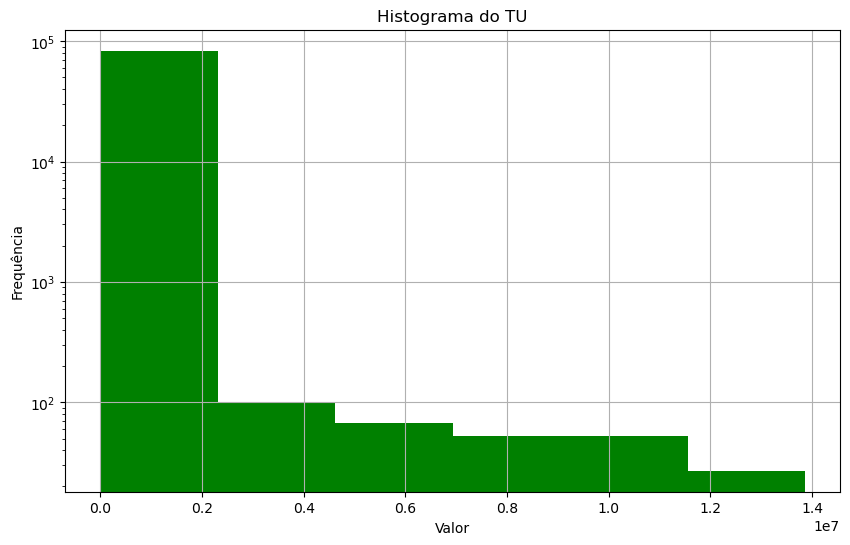

In [37]:
# Criar o histograma para a coluna 'TU'
fig, ax = plt.subplots(figsize=(10, 6))
df_num['TU'].hist(figsize=(10, 6), bins=6, color='green')

# Adicionar rótulos e título (opcional)
ax.set_xlabel('Valor')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do TU')

# Alterar a escala do eixo y
ax.set_yscale('log')

# Mostrar o histograma
plt.show()

In [38]:
# Insights:
# Frequentemente é transportado volume até 0.2*10^7 Tonelada útil

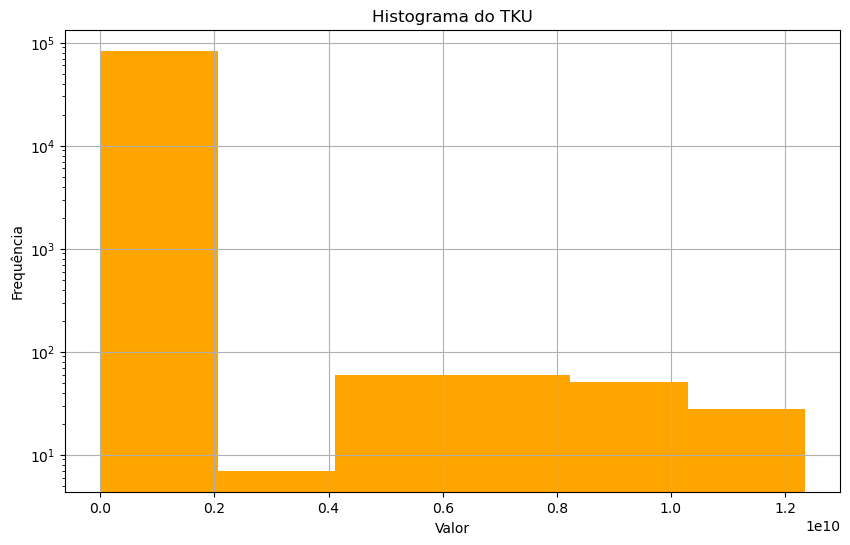

In [39]:
# Criar o histograma para a coluna 'TKU'
fig, ax = plt.subplots(figsize=(10, 6))
df_num['TKU'].hist(figsize=(10, 6), bins=6, color='orange')

# Ajustar os limites do eixo x
#ax.set_xlim(0, 12)  # Definir os limites do eixo x conforme desejado

# Alterar a escala do eixo y
ax.set_yscale('log')

# Adicionar rótulos e título (opcional)
ax.set_xlabel('Valor')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do TKU')

# Mostrar o histograma
plt.show()

In [40]:
# Insights:
# Frequentemente é transportado volume até 0.2*10^10 Tonelada-Km Útil

In [41]:
# Correlação (tabela)
df_num.corr()

,TU,TKU
TU,1.00000,0.98619
TKU,0.98619,1.00000


In [42]:
# As variáveis TU e TKU são altamente correlacionadas. Para Machine Learning, somente deve ser considerada uma destas variáveis.
# Como os valores são altos, deverão ser feitos ajustes na escala para trabalhar com ML.

### 7.5 - Exploração das variáveis categóricas

In [43]:
# Filtrar apenas colunas do tipo categórica
df_cat = df.select_dtypes(include=['object'])

In [44]:
df_cat.columns

Index(['Ferrovia', 'Mercadoria_ANTT', 'Estacao_Origem', 'UF_Origem',
       'Estacao_Destino', 'UF_Destino'],
      dtype='object')

In [45]:
#Quantidade de registros de cada ferrovia de carga
df['Ferrovia'].value_counts() 

Ferrovia
MRS      29708
RMS      17252
EFVM     10345
FCA       9484
FTL       4643
RMP       3621
RMN       2754
EFC       2058
FNSTN     1241
FTC        928
RMO        716
EFPO       474
RMC        341
Name: count, dtype: int64

C:\Users\Danilo\AppData\Local\Temp\ipykernel_26952\619290320.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


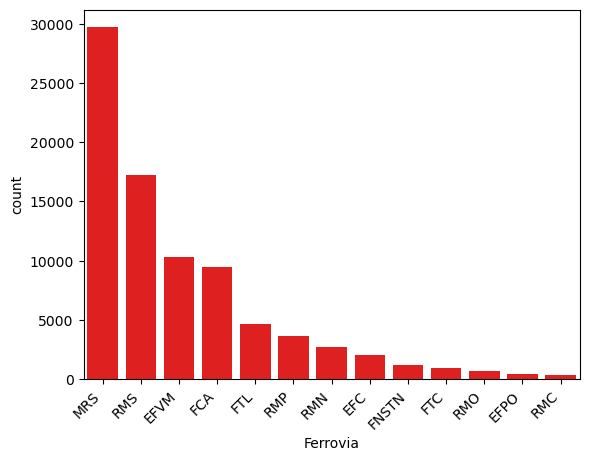

In [46]:
ax = sns.countplot(data=df, x='Ferrovia', order=df['Ferrovia'].value_counts().head(20).index, color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [47]:
quantidade_de_ferrovia = df['Ferrovia'].nunique()
print("Quantidade de ferrovias:", quantidade_de_ferrovia)

Quantidade de ferrovias: 13


In [48]:
# Insights:
# Temos 13 ferrovias sendo as que mais transportam são: MRS, RMS e EFVM

In [49]:
#Local de operação do trem
df['Mercadoria_ANTT'].value_counts() 

Mercadoria_ANTT
Minério de Ferro                8281
Prd. Siderúrgicos - Outros      5388
Contêiner Cheio de 40 Pés       4716
Óleo Diesel                     4489
Contêiner Cheio de 20 Pés       3991
                                ... 
Madeira                            3
Produtos Químicos - Perigoso       2
Farelo de Milho                    2
Outros - Produção agrícola         2
Argila                             1
Name: count, Length: 89, dtype: int64

C:\Users\Danilo\AppData\Local\Temp\ipykernel_26952\2232071529.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


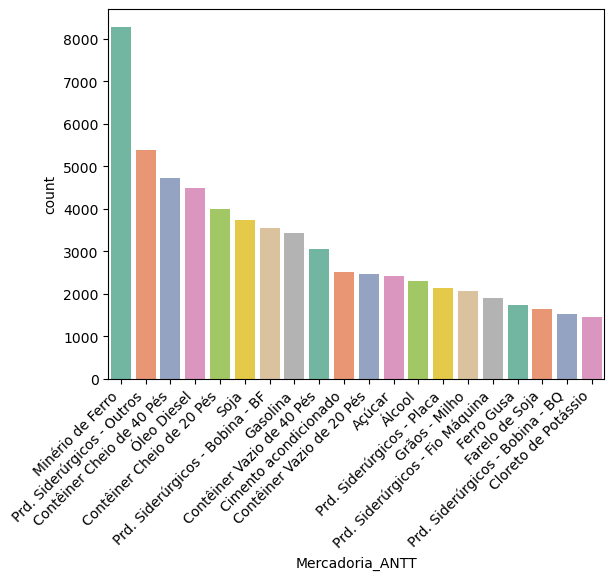

In [50]:
ax = sns.countplot(data=df, x='Mercadoria_ANTT', order=df['Mercadoria_ANTT'].value_counts().head(20).index, palette = 'Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [51]:
quantidade_de_tipos_mercadoria = df['Mercadoria_ANTT'].nunique()
print("Quantidade de tipos de mercadoria:", quantidade_de_tipos_mercadoria)

Quantidade de tipos de mercadoria: 89


In [52]:
# Insights:
# São 89 produtos diferentes sendo os mais transportados: Minério de ferro, produtos siderúrgicos e contêineres

In [53]:
#Local de partida do trem
df['Estacao_Origem'].value_counts() 

Estacao_Origem
Ouro Branco          3353
Tubarão              2543
D Pedro II           2519
Volta Redonda        2377
Conceiçãozinha       2231
                     ... 
Barão de Juparana       1
Eng. Afif.              1
Olival                  1
Barrinha                1
Cana Brava              1
Name: count, Length: 315, dtype: int64

C:\Users\Danilo\AppData\Local\Temp\ipykernel_26952\1788221504.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


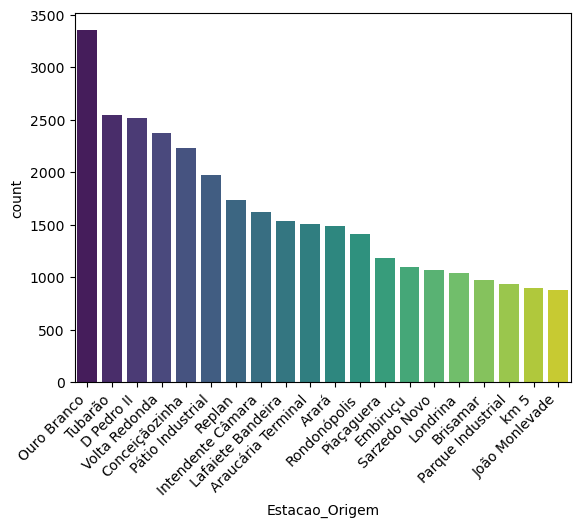

In [54]:
ax = sns.countplot(data=df, x='Estacao_Origem', order=df['Estacao_Origem'].value_counts().head(20).index, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [55]:
quantidade_de_local_partida = df['Estacao_Origem'].nunique()
print("Quantidade de locais de partida de trens:", quantidade_de_local_partida)

Quantidade de locais de partida de trens: 315


In [56]:
# Insights:
# Tem 315s locais de partida de trens o que dificulta achar um padrão para modelagem de dados
# A maior parte das viagens inicia em Ouro Branco (MG), Tubarão (SC) e D. Pedro II (RJ)

In [57]:
#Estado de partida do trem
df['UF_Origem'].value_counts() 

UF_Origem
MG    25971
SP    15595
PR    11178
RJ     7270
RS     5298
MA     3683
ES     3663
CE     2270
MT     2112
SC     1231
MS     1152
GO     1042
PA     1037
BA      990
TO      586
PI      366
DF      121
Name: count, dtype: int64

C:\Users\Danilo\AppData\Local\Temp\ipykernel_26952\501465901.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


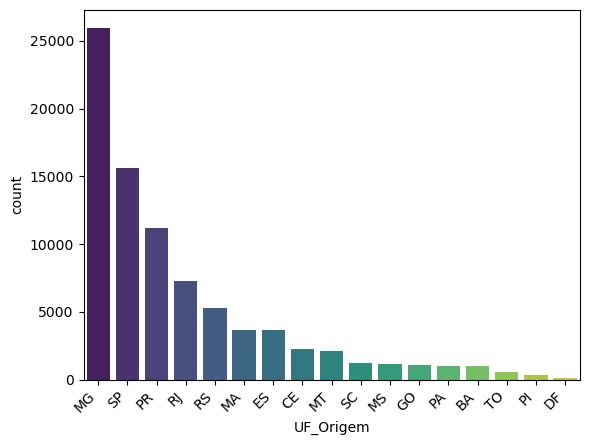

In [58]:
ax = sns.countplot(data=df, x='UF_Origem', order=df['UF_Origem'].value_counts().index, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [59]:
quantidade_de_estados_local_partida = df['UF_Origem'].nunique()
print("Quantidade de estados de partida de trens:", quantidade_de_estados_local_partida)

Quantidade de estados de partida de trens: 17


In [60]:
# Insights:
# Dos 26 estados e distrito federal, somente há 17 estados com partida de trens de carga com os estados MG, SP e PR com mais viagens

In [61]:
#Estado de chegada do trem
df['Estacao_Destino'].value_counts() 

Estacao_Destino
Tubarão              4537
Santos               3287
Conceiçãozinha       2964
D Pedro II           2894
Arará                2675
                     ... 
Córrego do Feijão       1
Barra do Pirai          1
Aurora                  1
Otavio Dapieve          1
Batista Almeida         1
Name: count, Length: 296, dtype: int64

C:\Users\Danilo\AppData\Local\Temp\ipykernel_26952\4283543038.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


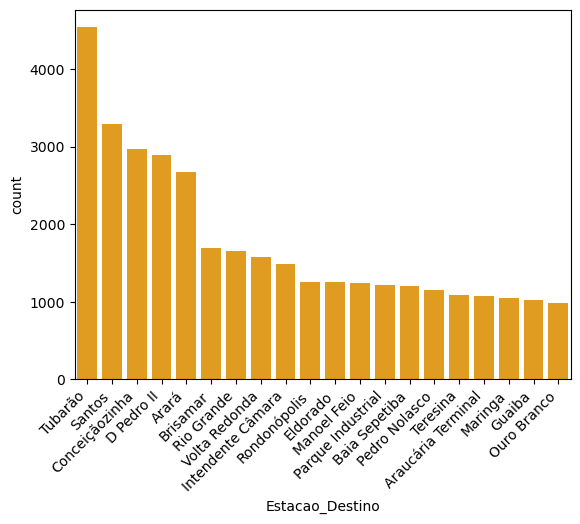

In [62]:
ax = sns.countplot(data=df, x='Estacao_Destino', order=df['Estacao_Destino'].value_counts().head(20).index, color = 'orange')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [63]:
quantidade_de_local_chegada = df['Estacao_Destino'].nunique()
print("Quantidade de locais de chegada de trens:", quantidade_de_local_chegada)

Quantidade de locais de chegada de trens: 296


In [64]:
# Insights:
# São muitos locais de destino de trens o que dificulta achar um padrão para modelagem de dados
# A maior parte das viagens termina em Tubarão (SC), Santos (SP) e Conceiçãozinha (SP)

In [65]:
#Estado de chegada do trem
df['UF_Destino'].value_counts() 

UF_Destino
SP    23251
MG    12882
RJ    11895
PR     9829
ES     6448
RS     5301
MA     3732
SC     2024
CE     1874
PI     1583
MT     1299
MS      868
BA      675
GO      644
DF      508
PA      447
TO      305
Name: count, dtype: int64

C:\Users\Danilo\AppData\Local\Temp\ipykernel_26952\2842447113.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


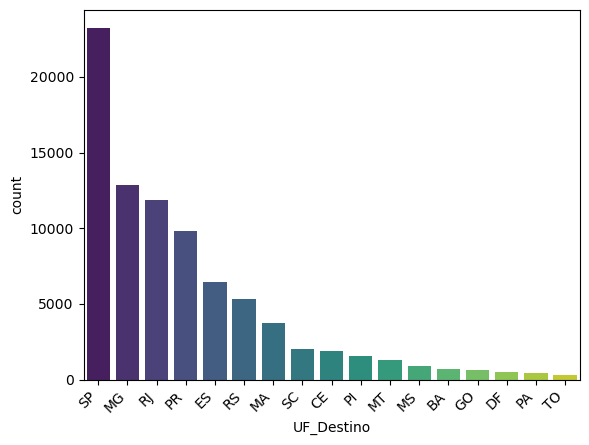

In [66]:
ax = sns.countplot(data=df, x='UF_Destino', order=df['UF_Destino'].value_counts().index, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [67]:
quantidade_de_estados_local_chegada = df['UF_Destino'].nunique()
print("Quantidade de estados de chegada de trens:", quantidade_de_estados_local_chegada)

Quantidade de estados de chegada de trens: 17


In [68]:
# Insights:
# Dos 26 estados e distrito federal, somente há 17 estados com chegada de trens de carga com os estados MG, SP e RJ com mais viagens

### 7.6 - Exploração das variáveis associadas com data

In [69]:
# data mais antiga nestes dados
df['Mes_Ano'].min()

Timestamp('2013-01-01 00:00:00')

In [70]:
# data mais recente nestes dados
df['Mes_Ano'].max()

Timestamp('2023-12-01 00:00:00')

In [71]:
# Temos informações mensais de 2013 a 2023

In [72]:
#vamos separar a variável Mes_Ano em duas para aumentar nossos conhecimentos sobre os dados:
# Extrair o mês e o ano
df['Mes'] = df['Mes_Ano'].dt.month
df['Ano'] = df['Mes_Ano'].dt.year

In [73]:
df.sample(5)

,Mes_Ano,Ferrovia,Mercadoria_ANTT,Estacao_Origem,UF_Origem,Estacao_Destino,UF_Destino,TU,TKU,Mes,Ano
79920,2023-07-01,MRS,Minério de Ferro,Olhos D Água,MG,Baia Sepetiba,RJ,15183.0,8365635.0,7,2023
6848,2013-11-01,FCA,Magnesita,Catiboaba,BA,Porto de Aratu,BA,3649.0,2212177.0,11,2013
28220,2016-11-01,FCA,Calcário Siderúrgico,Nova Granja,MG,Tubarão,ES,41924.0,28548651.0,11,2016
52499,2020-01-01,RMP,Contêiner Cheio de 40 Pés,Cubatão,SP,Rondonópolis,MT,3054.0,4972164.0,1,2020
66129,2021-10-01,RMN,Contêiner Cheio de 40 Pés,Rondonópolis,MT,Cubatão,SP,49295.0,80256351.0,10,2021


In [74]:
# Qual mercadoria é mais transportada cada mês? 
# Agrupar por mês e ano e encontrar a mercadoria mais transportada
resultados = df.groupby(['Ano', 'Mes', 'Mercadoria_ANTT']).agg({'TU': 'sum'}).reset_index()
resultados = resultados.sort_values(by=['Ano', 'Mes', 'TU'], ascending=[True, True, False])
resultados_mais_transportada = resultados.groupby(['Ano', 'Mes']).first().reset_index()

# Mostrar o DataFrame com a mercadoria mais transportada por mês
print(resultados_mais_transportada)

      Ano  Mes   Mercadoria_ANTT          TU
0    2013    1  Minério de Ferro  25837836.0
1    2013    2  Minério de Ferro  23338529.0
2    2013    3  Minério de Ferro  25978061.0
3    2013    4  Minério de Ferro  25667031.0
4    2013    5  Minério de Ferro  27623456.0
..    ...  ...               ...         ...
127  2023    8  Minério de Ferro  34133858.0
128  2023    9  Minério de Ferro  35461020.0
129  2023   10  Minério de Ferro  34828721.0
130  2023   11  Minério de Ferro  33803537.0
131  2023   12  Minério de Ferro  37522399.0

[132 rows x 4 columns]


In [75]:
resultados_mais_transportada['Mercadoria_ANTT'].nunique()

1

In [76]:
resultados_mais_transportada['Mercadoria_ANTT'].unique()

array(['Minério de Ferro'], dtype=object)

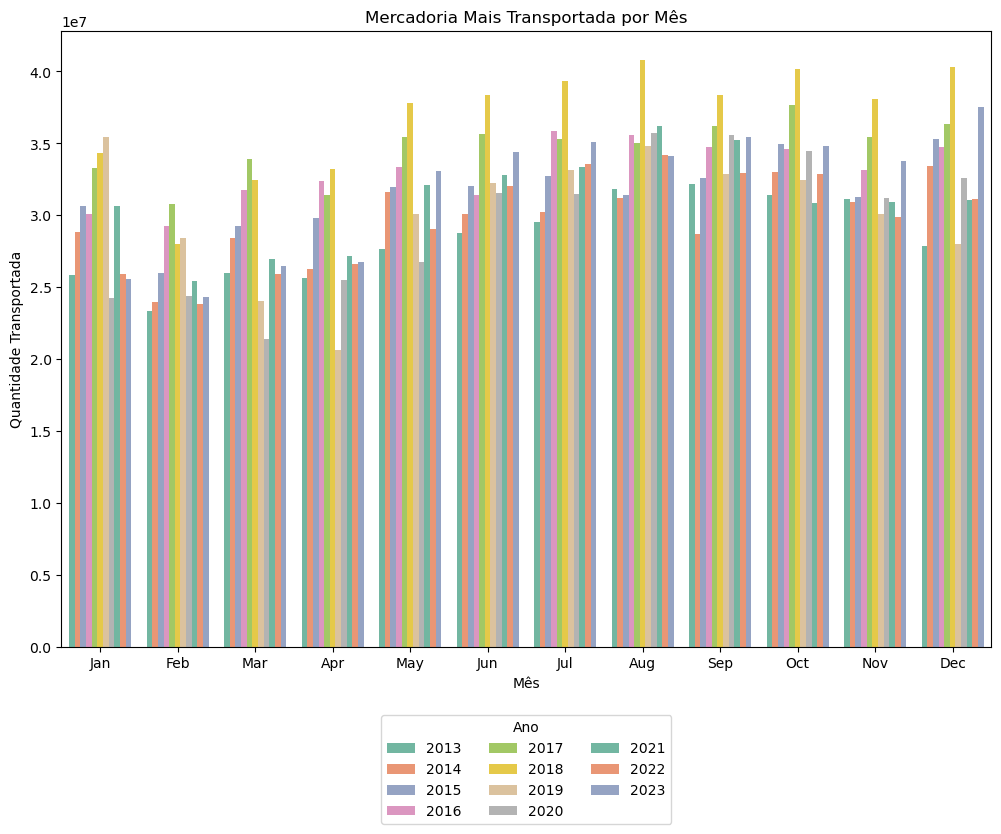

In [77]:
# Qual mercadoria é mais transportada cada mês? - Gráfico
# Criar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=resultados_mais_transportada, x='Mes', y='TU', hue='Ano', palette='Set2')

# Ajustar o gráfico
plt.title('Mercadoria Mais Transportada por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade Transportada')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Ajustar a legenda para ser horizontal
plt.legend(title='Ano', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)
plt.show()

In [78]:
# Em todos os meses, a mercadoria mais transportada é o minério de ferro. 

In [79]:
# Agrupar por ferrovia e ano e somar a quantidade
agregado = df.groupby(['Ferrovia', 'Ano']).agg({'TU': 'sum'}).reset_index()

# Encontrar o ano com maior transporte para cada ferrovia
max_transport = agregado.loc[agregado.groupby('Ferrovia')['TU'].idxmax()]

# Ordenar o DataFrame em ordem decrescente com base na coluna 'TU'
max_transport_sorted = max_transport.sort_values(by='TU', ascending=False)

# Mostrar o DataFrame com o ano de maior transporte para cada ferrovia em ordem decrescente
print(max_transport_sorted)

    Ferrovia   Ano           TU
5        EFC  2018  205406565.0
87       MRS  2023  143665952.0
24      EFVM  2015  132975557.0
38       FCA  2018   34936938.0
101      RMN  2023   29489522.0
124      RMS  2013   22939727.0
54     FNSTN  2023   13573096.0
90       RMC  2023    8712403.0
120      RMP  2020    8097876.0
103      RMO  2014    5600450.0
56       FTC  2014    3854429.0
74       FTL  2021    2968180.0
17      EFPO  2019     686526.0


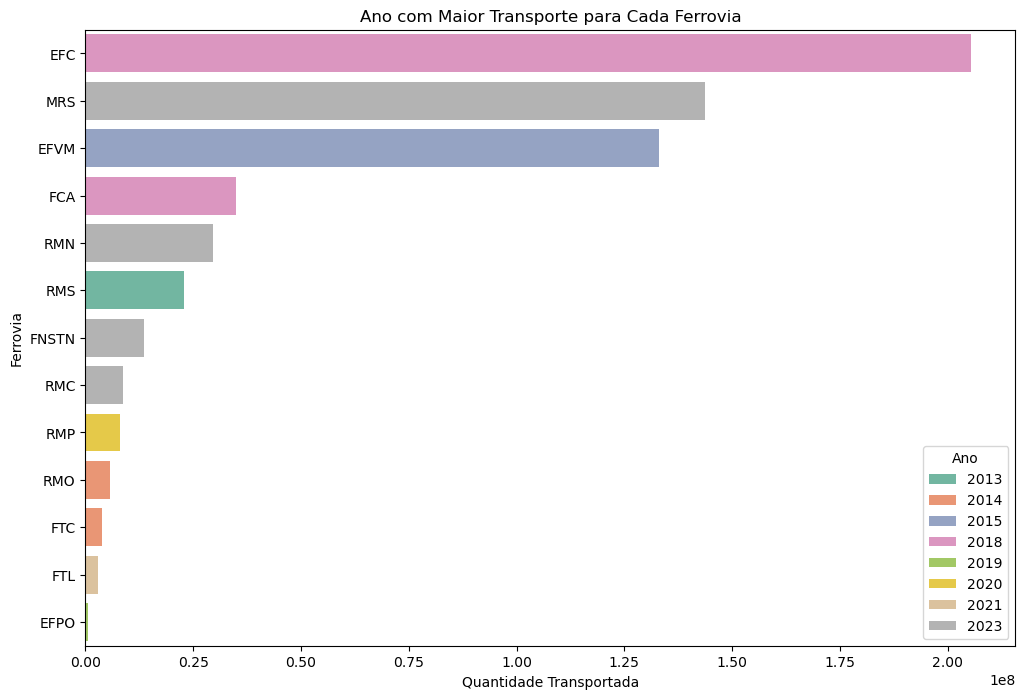

In [80]:
# Que ano cada ferrovia transportou mais? - Gráfico
# Criar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=max_transport_sorted, x='TU', y='Ferrovia', hue='Ano', palette='Set2')

# Ajustar o gráfico
plt.title('Ano com Maior Transporte para Cada Ferrovia')
plt.xlabel('Quantidade Transportada')
plt.ylabel('Ferrovia')
plt.legend(title='Ano')
plt.show()

In [81]:
# Das ferrovias que mais transportaram, a ferrovia EFC transportou mais no ano de 2018, a MRS em 2023 e a EFVM em 2015

In [82]:
# Que mês/ano cada ferrovia transportou mais? - código
# Agrupar por ferrovia e mês/ano e somar a quantidade
agregado = df.groupby(['Ferrovia', 'Mes_Ano']).agg({'TU': 'sum'}).reset_index()

# Encontrar o mês/ano com maior transporte para cada ferrovia
max_transport = agregado.loc[agregado.groupby('Ferrovia')['TU'].idxmax()]

# Ordenar o DataFrame em ordem decrescente com base na coluna 'TU'
max_transport_sorted = max_transport.sort_values(by='TU', ascending=False)

# Mostrar o DataFrame com o ano de maior transporte para cada ferrovia em ordem decrescente
print(max_transport_sorted)

     Ferrovia    Mes_Ano          TU
92        EFC 2020-09-01  19957563.0
1048      MRS 2023-10-01  13856508.0
289      EFVM 2015-07-01  12078257.0
459       FCA 2018-09-01   4639721.0
1213      RMN 2023-09-01   2809151.0
1581      RMS 2021-05-01   2251362.0
645     FNSTN 2023-03-01   1348774.0
1442      RMP 2020-10-01   1095466.0
1076      RMC 2023-04-01    964007.0
1235      RMO 2014-07-01    535513.0
676       FTC 2014-10-01    353193.0
904       FTL 2022-10-01    291691.0
217      EFPO 2020-02-01     90859.0


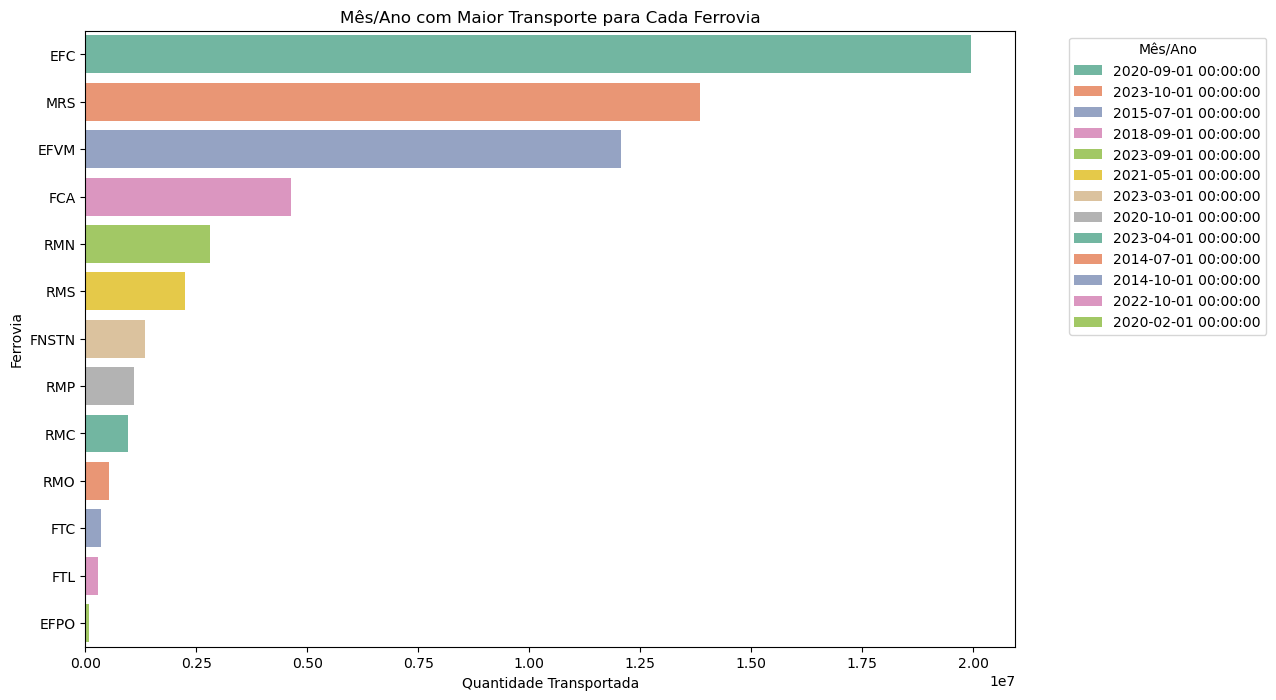

In [83]:
# Que mês/ano cada ferrovia transportou mais? - Gráfico
# Criar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=max_transport_sorted, x='TU', y='Ferrovia', hue='Mes_Ano', palette='Set2')

# Ajustar o gráfico
plt.title('Mês/Ano com Maior Transporte para Cada Ferrovia')
plt.xlabel('Quantidade Transportada')
plt.ylabel('Ferrovia')
plt.legend(title='Mês/Ano', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [84]:
# Das ferrovias que mais transportaram, a ferrovia EFC transportou mais em Setembro de 2020, a MRS em Utubro de 2023 e a EFVM em Julho de 2015

# 8 - Perguntas e respostas de negócio

### 8.1 - Quais são os volumes de carga transportada por mês e por ano? 

#### 8.1.1 - Volumes de carga transportada por mês e ano

In [85]:
# Solução item 8.1 - código
# Agrupar por mês e ano e somar a quantidade de carga transportada
volume_por_mes_ano = df.groupby('Mes_Ano').agg({'TU': 'sum'}).reset_index()
volume_por_mes_ano.columns = ['Mes_Ano', 'Volume']

# Agrupar por ano e somar a quantidade de carga transportada
volume_por_ano = df.groupby('Ano').agg({'TU': 'sum'}).reset_index()
volume_por_ano.columns = ['Ano', 'Volume']

# Mostrar os resultados
print("Volume de Carga por Mês/Ano:")
print(volume_por_mes_ano)

print("\nVolume de Carga por Ano:")
print(volume_por_ano)

Volume de Carga por Mês/Ano:
       Mes_Ano      Volume
0   2013-01-01  33625427.0
1   2013-02-01  30909794.0
2   2013-03-01  35104713.0
3   2013-04-01  34749411.0
4   2013-05-01  37185188.0
..         ...         ...
127 2023-08-01  47888636.0
128 2023-09-01  49370607.0
129 2023-10-01  47905361.0
130 2023-11-01  45961000.0
131 2023-12-01  49299991.0

[132 rows x 2 columns]

Volume de Carga por Ano:
     Ano       Volume
0   2013  450692632.0
1   2014  465880887.0
2   2015  492826108.0
3   2016  505184195.0
4   2017  540237780.0
5   2018  571621071.0
6   2019  494489680.0
7   2020  489619011.0
8   2021  506796406.0
9   2022  500767913.0
10  2023  530596848.0


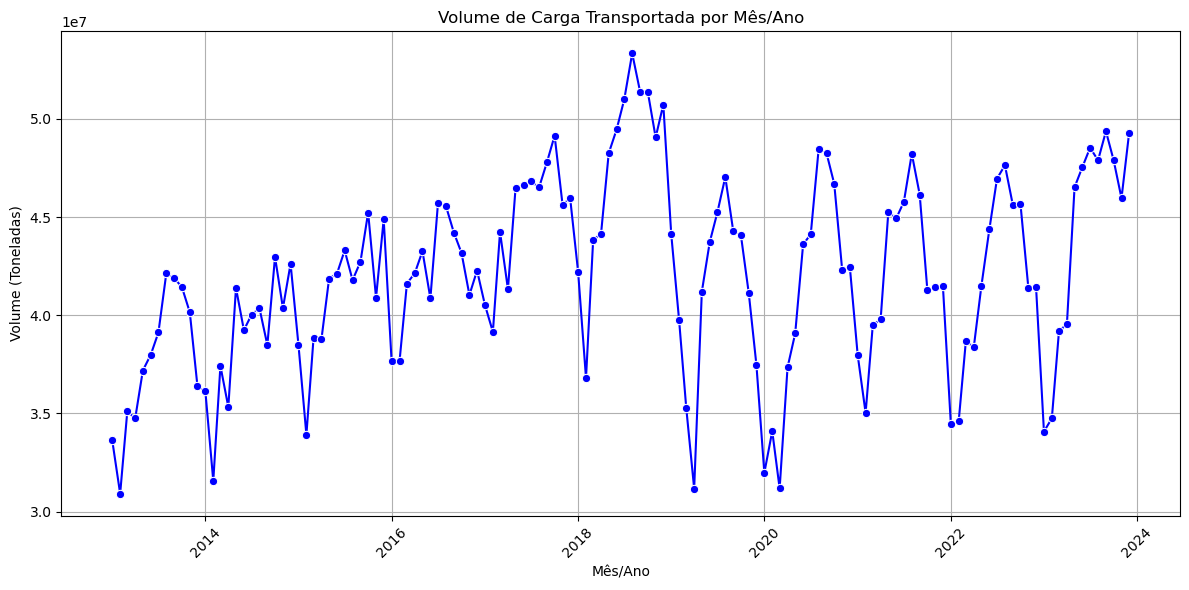

In [86]:
# Solução item 8.1 - gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=volume_por_mes_ano, x='Mes_Ano', y='Volume', marker='o', color='b')
plt.title('Volume de Carga Transportada por Mês/Ano')
plt.xlabel('Mês/Ano')
plt.ylabel('Volume (Toneladas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
# Insights: Considerando todas as ferrovias, o melhor período em termos de volume transportado foi Julho de 2018 e o pior foi em Fevereiro de 2013.

#### 8.1.2 - Volumes de carga transportada por ano

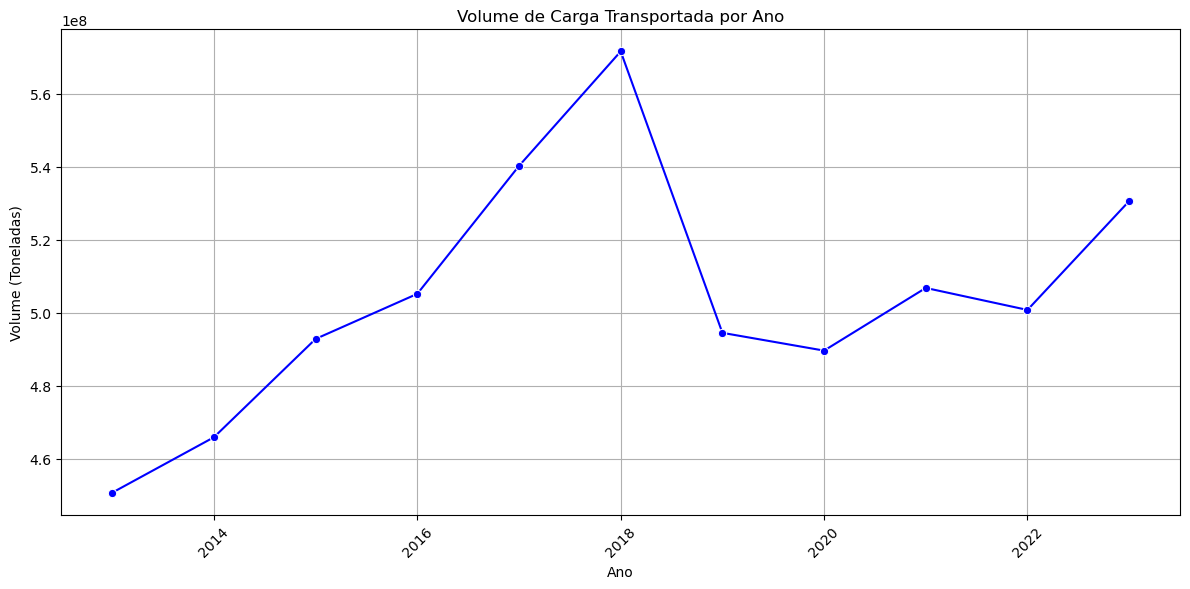

In [88]:
#Pergunta: Quais são os volumes de carga transportada por ano? - Gráfico
# Criar o gráfico para volume por ano
plt.figure(figsize=(12, 6))
sns.lineplot(data=volume_por_ano, x='Ano', y='Volume', marker='o', color='b')
plt.title('Volume de Carga Transportada por Ano')
plt.xlabel('Ano')
plt.ylabel('Volume (Toneladas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
# Insights: Considerando todas as ferrovias, o melhor ano em termos de volume transportado foi 2018 e o pior foi 2013.

### 8.2 Análise de Distribuição das Mercadorias Transportadas

#### 8.2.1 - Volume de transporte de Mercadorias 

In [90]:
# Análise da distribuição das mercadorias - código
mercadoria_distribuicao = df.groupby('Mercadoria_ANTT').agg({'TU': 'sum'}).reset_index()
mercadoria_distribuicao.columns = ['Mercadoria', 'Volume']
# Ordenar o DataFrame por volume em ordem decrescente
mercadoria_distribuicao_sorted = mercadoria_distribuicao.sort_values(by='Volume', ascending=False)
mercadoria_distribuicao_sorted.head(5)

,Mercadoria,Volume
53,Minério de Ferro,4.159347e+09
81,Soja,2.782263e+08
46,Grãos - Milho,1.801757e+08
8,Açúcar,1.450475e+08
14,Carvão Mineral,8.875477e+07


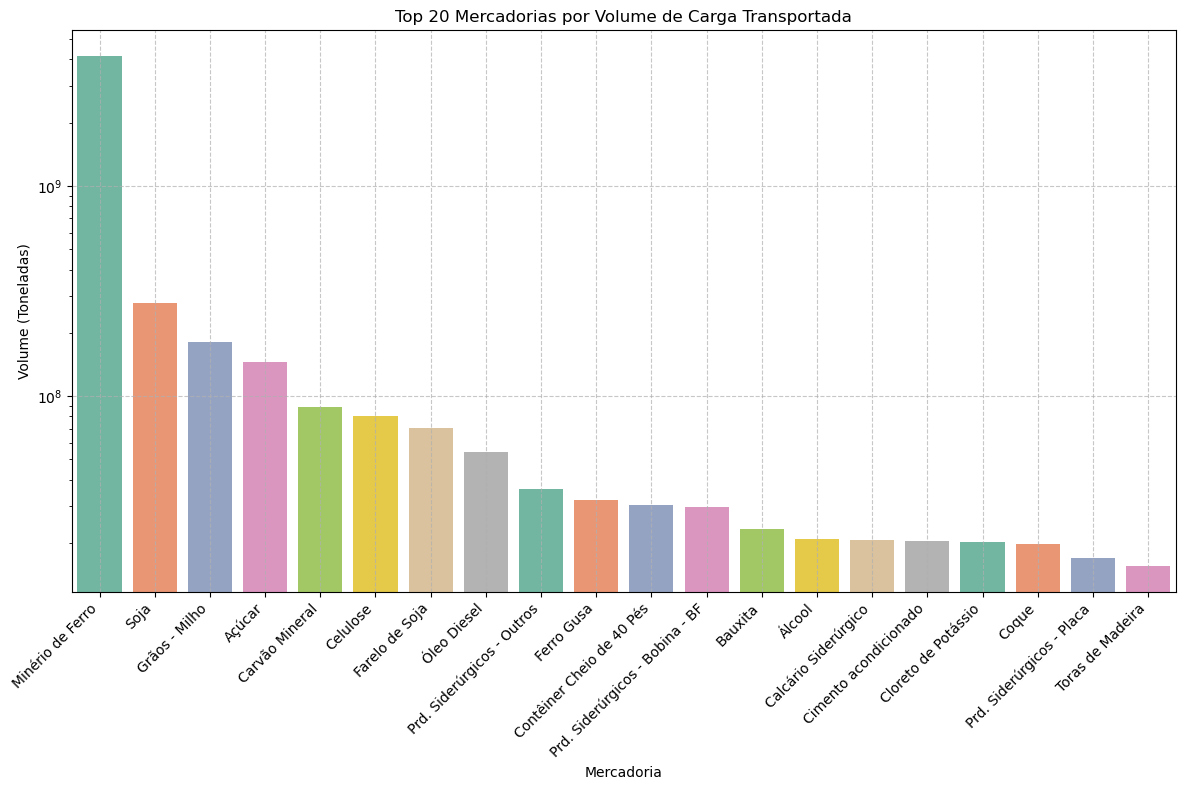

In [91]:
# Gráfico de distribuição das mercadorias - gráfico
# Limitar ao top 20 mercadorias por volume
top_20_mercadorias = mercadoria_distribuicao_sorted.head(20)

# Criar o gráfico para a distribuição das mercadorias
plt.figure(figsize=(12, 8))  # Ajuste o tamanho se necessário
bar_plot=sns.barplot(data=top_20_mercadorias, x='Mercadoria', y='Volume', palette='Set2')
# Ajustar a escala do eixo y para logarítmica
bar_plot.set_yscale('log')
plt.title('Top 20 Mercadorias por Volume de Carga Transportada')
plt.xlabel('Mercadoria')
plt.ylabel('Volume (Toneladas)')
plt.xticks(rotation=45, ha='right')  # Melhora a legibilidade
plt.grid(True, linestyle='--', alpha=0.7)  # Ajuste a grade para melhor visualização
plt.tight_layout()
plt.show()

In [92]:
# As 5 mercadorias mais transportadas foram: Minério de ferro, soja, grãos (milho), açúcar e carvão mineral

### 8.3 - Análise por Ferrovia

#### 8.3.1 - Volume de transporte de Mercadorias por Ferrovia

In [93]:
# Análise por ferrovia - código
ferrovia_distribuicao = df.groupby('Ferrovia').agg({'TU': 'sum'}).reset_index()
ferrovia_distribuicao.columns = ['Ferrovia', 'Volume']
# Ordenar o DataFrame por volume em ordem decrescente
ferrovia_distribuicao_sorted = ferrovia_distribuicao.sort_values(by='Volume', ascending=False)
ferrovia_distribuicao_sorted

,Ferrovia,Volume
0,EFC,1.832602e+09
7,MRS,1.441790e+09
2,EFVM,1.188832e+09
3,FCA,3.258335e+08
9,RMN,2.402071e+08
12,RMS,2.358986e+08
4,FNSTN,9.121536e+07
11,RMP,6.509695e+07
10,RMO,4.069497e+07
5,FTC,3.492202e+07


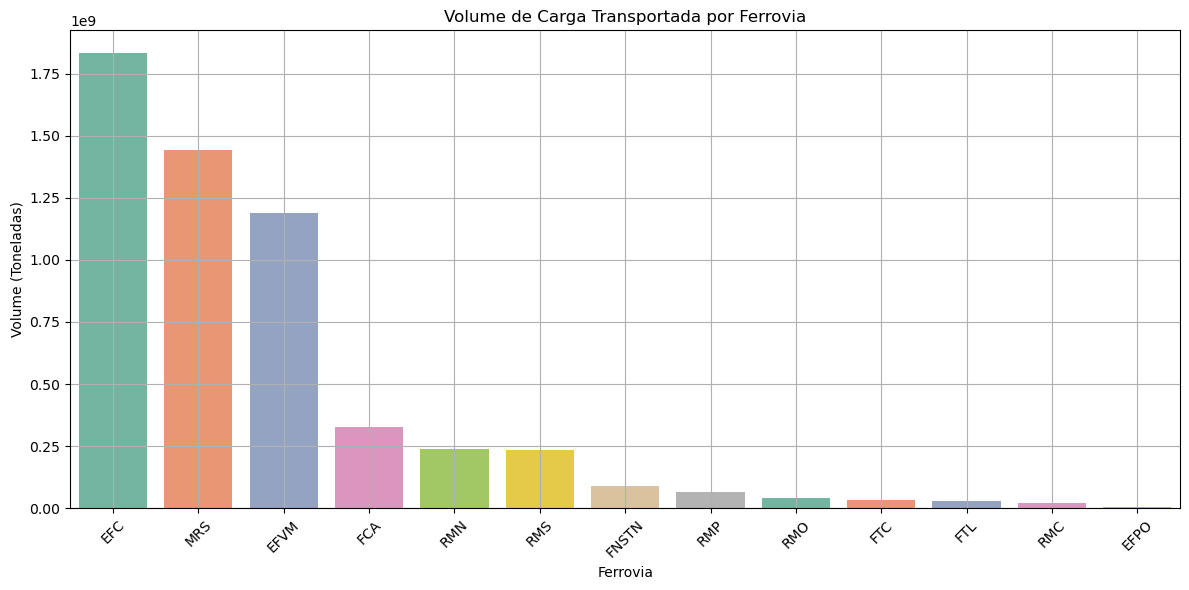

In [94]:
# Gráfico de distribuição por ferrovia - gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=ferrovia_distribuicao_sorted, x='Ferrovia', y='Volume', palette='Set2')
plt.title('Volume de Carga Transportada por Ferrovia')
plt.xlabel('Ferrovia')
plt.ylabel('Volume (Toneladas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
# Insights: As ferrovias que mais transportaram foram EFC, MRS e EFVM.

### 8.4 - Análise por Região

##### 8.4.1 - Análise de volume de mercadorias transportado por Estação de Origem e Destino

In [96]:
df.columns

Index(['Mes_Ano', 'Ferrovia', 'Mercadoria_ANTT', 'Estacao_Origem', 'UF_Origem',
       'Estacao_Destino', 'UF_Destino', 'TU', 'TKU', 'Mes', 'Ano'],
      dtype='object')

In [97]:
# Análise por estação de origem - código
estacao_origem_distribuicao = df.groupby('Estacao_Origem').agg({'TU': 'sum'}).reset_index()
estacao_origem_distribuicao.columns = ['Estacao_Origem', 'Volume']
# Ordenar o DataFrame por volume em ordem decrescente
estacao_origem_distribuicao_sorted = estacao_origem_distribuicao.sort_values(by='Volume', ascending=False)
estacao_origem_distribuicao_sorted.head(10)

,Estacao_Origem,Volume
60,Carajás,1.318360e+09
270,Serra Sul,4.531928e+08
202,Otavio Dapieve,3.732107e+08
49,Brucutu,2.761884e+08
83,Conceição,2.263372e+08
69,Casa de Pedra,2.061267e+08
254,Rondonópolis,1.671027e+08
224,Pires,1.514960e+08
171,João Paulo,1.314186e+08
199,Olhos D Água,1.219685e+08


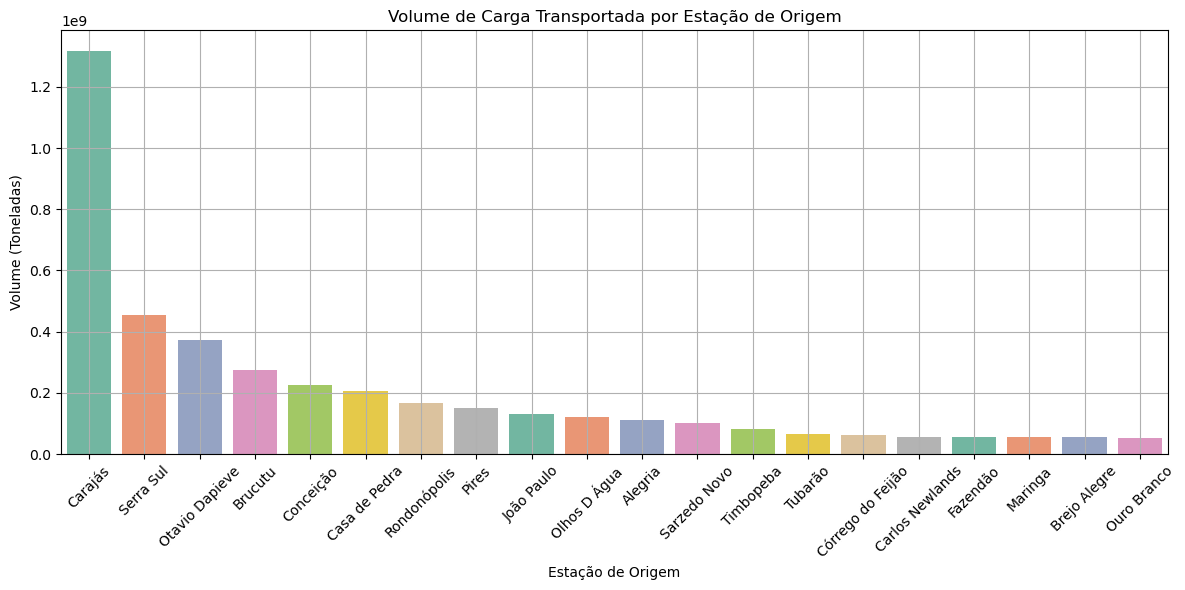

In [98]:
# Análise por estação de origem - gráfico
# Limitar ao top 20 estação de origem por volume
top_20_estação_origem = estacao_origem_distribuicao_sorted.head(20)
# Gráfico de distribuição por estação de origem
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_estação_origem, x='Estacao_Origem', y='Volume', palette='Set2')
plt.title('Volume de Carga Transportada por Estação de Origem')
plt.xlabel('Estação de Origem')
plt.ylabel('Volume (Toneladas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
# Insights: Carajás (PA), Serra Sul (PA) e Otávio Dapieve (MG) são as estações de origem que mais transportaram mercadorias.

In [100]:
# Análise por estação de destino - código
estacao_destino_distribuicao = df.groupby('Estacao_Destino').agg({'TU': 'sum'}).reset_index()
estacao_destino_distribuicao.columns = ['Estacao_Destino', 'Volume']
estacao_destino_distribuicao
estacao_destino_distribuicao_sorted = estacao_destino_distribuicao.sort_values(by='Volume', ascending=False)
estacao_destino_distribuicao_sorted.head(10)

,Estacao_Destino,Volume
214,Ponta da Madeira,1.400735e+09
278,Tubarão,1.125332e+09
25,Baia Sepetiba,5.187051e+08
126,Guaiba,3.956676e+08
289,Virador de Vagões Minério,3.865212e+08
251,Santos,2.399247e+08
77,Conceiçãozinha,1.230587e+08
91,D Pedro II,1.021734e+08
291,Volta Redonda,1.018120e+08
216,Ponta da Madeira Pêra do Píer,7.840258e+07


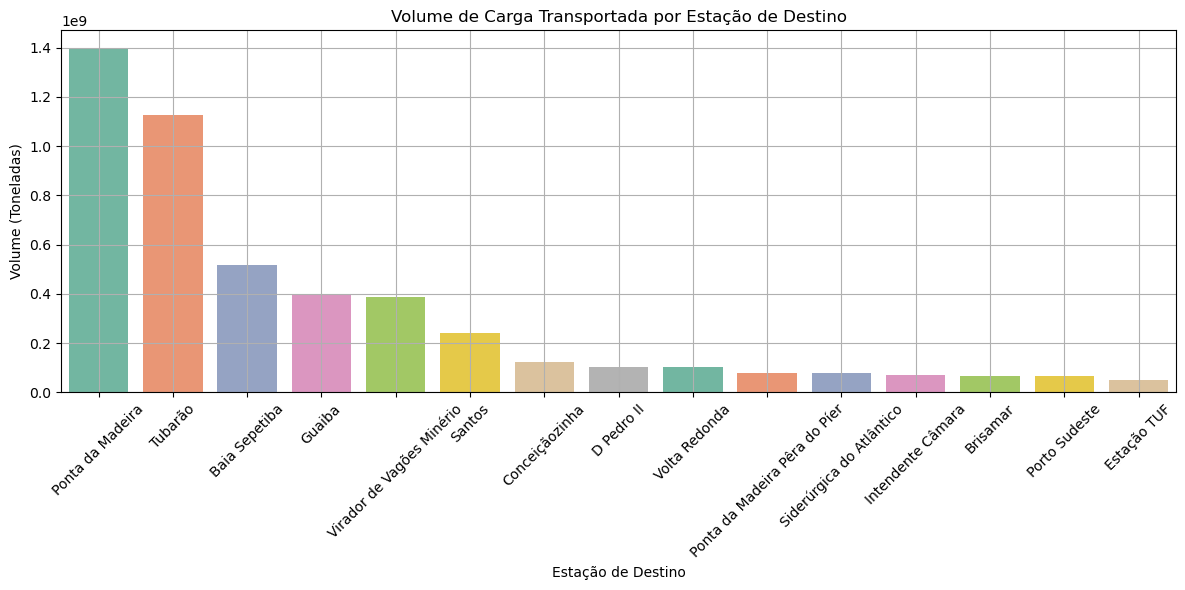

In [101]:
# Gráfico de distribuição por estação de destino - gráfico
plt.figure(figsize=(12, 6))
# Limitar ao top 20 estação de origem por volume
top_15_estação_destino = estacao_destino_distribuicao_sorted.head(15)
sns.barplot(data=top_15_estação_destino, x='Estacao_Destino', y='Volume', palette='Set2')
plt.title('Volume de Carga Transportada por Estação de Destino')
plt.xlabel('Estação de Destino')
plt.ylabel('Volume (Toneladas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [102]:
# Insights: Ponta da Madeira (MA), Tubarão (SC) e Baia Sepetiba (RJ) são as estações de destino que mais receberam mercadorias transportadas.

In [103]:
#df[df['Estacao_Destino'] == 'Baia Sepetiba']

#### 8.4.2 Análise de volume de mercadorias transportado por UF de Origem e Destino

In [104]:
# Análise por UF de origem - código
uf_origem_distribuicao = df.groupby('UF_Origem').agg({'TU': 'sum'}).reset_index()
uf_origem_distribuicao.columns = ['UF_Origem', 'Volume']
uf_origem_distribuicao_sorted = uf_origem_distribuicao.sort_values(by='Volume', ascending=False)
uf_origem_distribuicao_sorted.head(10)

,UF_Origem,Volume
6,MG,2.622815e+09
9,PA,1.810845e+09
15,SP,2.131030e+08
8,MT,2.092396e+08
11,PR,1.859859e+08
12,RJ,8.490993e+07
5,MA,8.179626e+07
3,ES,7.436862e+07
7,MS,7.066879e+07
16,TO,5.169408e+07


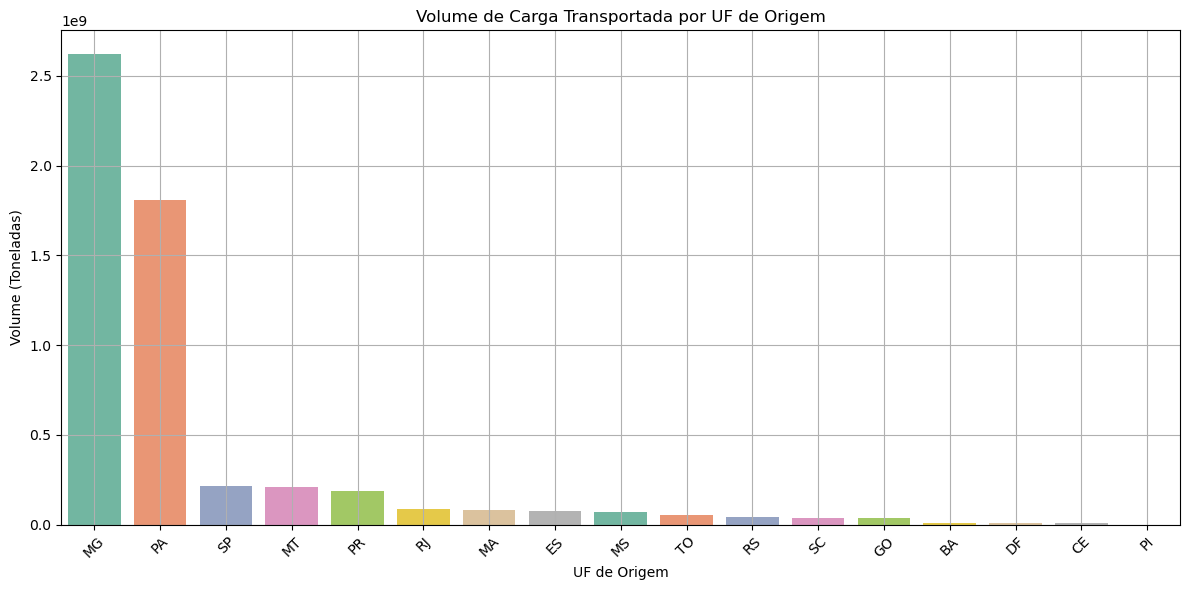

In [105]:
# Análise por UF de origem - gráfico
# Gráfico de distribuição por UF de origem
plt.figure(figsize=(12, 6))
sns.barplot(data=uf_origem_distribuicao_sorted, x='UF_Origem', y='Volume', palette='Set2')
plt.title('Volume de Carga Transportada por UF de Origem')
plt.xlabel('UF de Origem')
plt.ylabel('Volume (Toneladas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
# Insights: MG, PA e SP são os estados de origem que mais transportaram mercadorias.

In [107]:
# Análise por UF de destino - código
uf_destino_distribuicao = df.groupby('UF_Destino').agg({'TU': 'sum'}).reset_index()
uf_destino_distribuicao.columns = ['UF_Destino', 'Volume']
uf_destino_distribuicao_sorted = uf_destino_distribuicao.sort_values(by='Volume', ascending=False)
uf_destino_distribuicao_sorted

,UF_Destino,Volume
5,MA,1.925432e+09
12,RJ,1.285051e+09
3,ES,1.157675e+09
15,SP,5.645927e+08
6,MG,2.422659e+08
11,PR,1.507346e+08
14,SC,7.083265e+07
13,RS,4.939327e+07
7,MS,3.926409e+07
8,MT,2.308515e+07


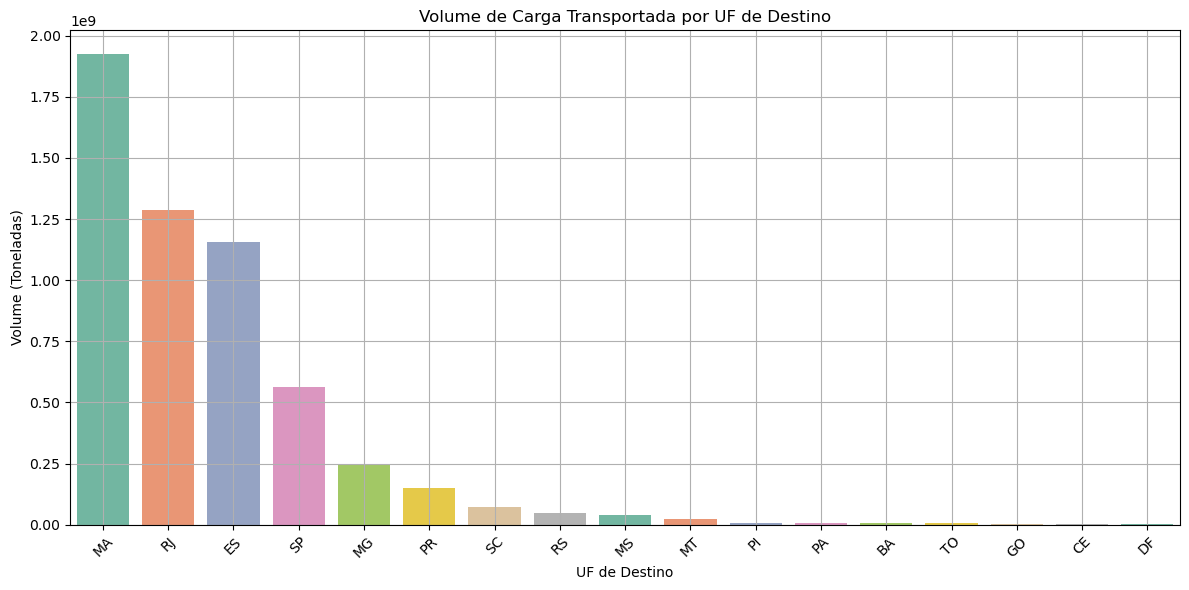

In [108]:
# Análise por UF de destino - gráfico
# Gráfico de distribuição por UF de destino
plt.figure(figsize=(12, 6))
sns.barplot(data=uf_destino_distribuicao_sorted, x='UF_Destino', y='Volume', palette='Set2')
plt.title('Volume de Carga Transportada por UF de Destino')
plt.xlabel('UF de Destino')
plt.ylabel('Volume (Toneladas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
# Insights: MA, RJ e ES são os estados de destino que mais receberam mercadorias transportadas.

### 8.5 - Eficiência do transporte

In [110]:
#Pergunta: Qual é a eficiência média do transporte ferroviário em termos de tonelada-quilômetro útil (coluna tku) para diferentes ferrovias e mercadorias?
#Tarefas:
#Calcular a eficiência média (tku por tonelada) por ferrovia e por tipo de mercadoria.
#Identificar quais ferrovias e mercadorias têm a melhor e a pior eficiência.

#### 8.5.1 - Gráfico da Eficiência Média por Ferrovia

In [111]:
# Calcular Eficiência Média por Ferrovia e Mercadoria - código
# Calcular eficiência por ferrovia
df['Eficiencia'] = df['TKU'] / df['TU']
eficiencia_ferrovia = df.groupby('Ferrovia').agg({'Eficiencia': 'mean'}).reset_index()

# Calcular eficiência por mercadoria
eficiencia_mercadoria = df.groupby('Mercadoria_ANTT').agg({'Eficiencia': 'mean'}).reset_index()

# Identificar melhor e pior eficiência por ferrovia
melhor_pior_ferrovia = eficiencia_ferrovia.sort_values(by='Eficiencia', ascending=False)

# Identificar melhor e pior eficiência por mercadoria
melhor_pior_mercadoria = eficiencia_mercadoria.sort_values(by='Eficiencia', ascending=False)

print("Eficiência Média por Ferrovia:\n", eficiencia_ferrovia)
print("\nEficiência Média por Mercadoria:\n", eficiencia_mercadoria)
print("\nMelhor e Pior Eficiência por Ferrovia:\n", melhor_pior_ferrovia)
print("\nMelhor e Pior Eficiência por Mercadoria:\n", melhor_pior_mercadoria)

Eficiência Média por Ferrovia:
    Ferrovia   Eficiencia
0       EFC   628.737127
1      EFPO   393.509668
2      EFVM   485.011349
3       FCA   709.369315
4     FNSTN  1006.411333
5       FTC    87.465101
6       FTL   541.146538
7       MRS   381.779876
8       RMC  1135.393031
9       RMN  1400.243756
10      RMO   679.898443
11      RMP   926.458532
12      RMS   706.361877

Eficiência Média por Mercadoria:
                              Mercadoria_ANTT   Eficiencia
0   Adubo Fert em Geral a Granel  - Perigoso   945.938766
1                    Adubo Orgânico a Granel   834.118682
2               Adubo Orgânico acondicionado  1010.982260
3                                   Alumínio  1052.579879
4                                     Amônia  1325.333542
..                                       ...          ...
84                                     Ureia   962.604287
85                                  Veículos   611.899320
86                                    Álcool   863.194019
87 

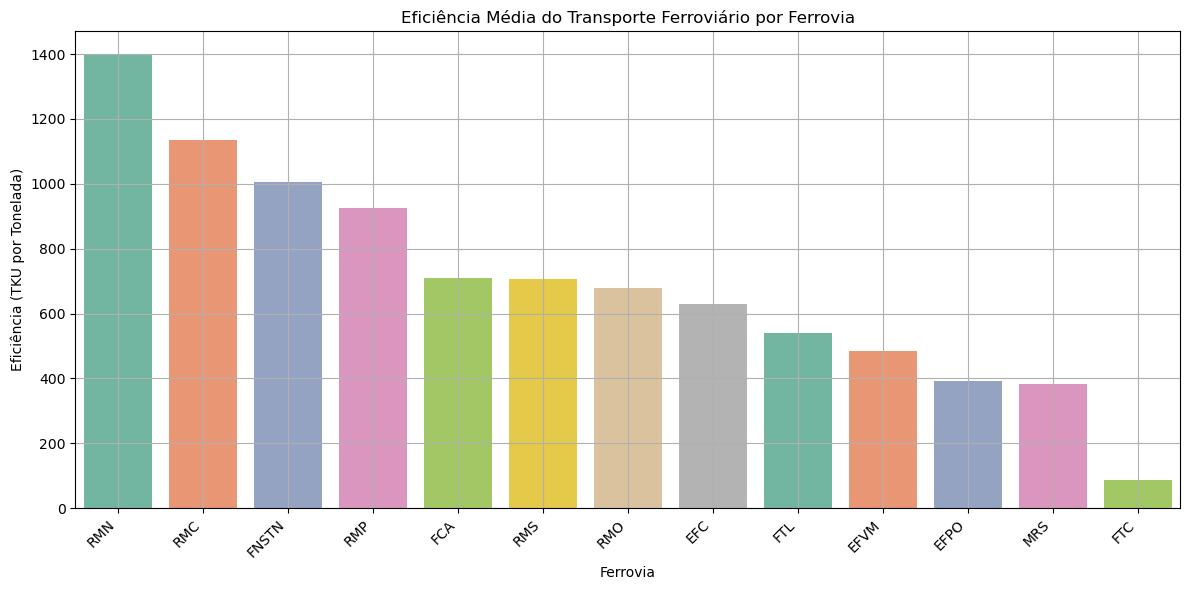

In [112]:
# Gráfico de eficiência média por ferrovia
plt.figure(figsize=(12, 6))
sns.barplot(data=melhor_pior_ferrovia, x='Ferrovia', y='Eficiencia', palette='Set2')
plt.title('Eficiência Média do Transporte Ferroviário por Ferrovia')
plt.xlabel('Ferrovia')
plt.ylabel('Eficiência (TKU por Tonelada)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [113]:
# As ferrovias mais eficientes foram: RMN, RMC e FNSTN.

#### 8.5.2 - Gráfico da Eficiência Média por Mercadoria

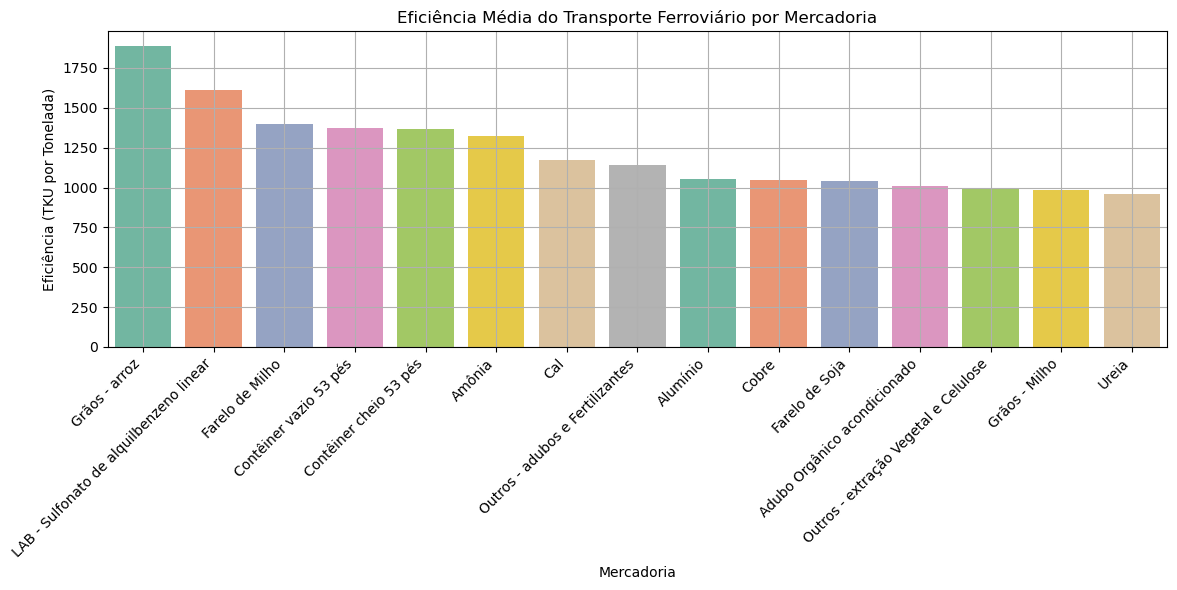

In [114]:
# Limitar ao top 20 estação de origem por volume
top_20_melhor_mercadoria = melhor_pior_mercadoria.head(15)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_melhor_mercadoria, x='Mercadoria_ANTT', y='Eficiencia', palette='Set2')
plt.title('Eficiência Média do Transporte Ferroviário por Mercadoria')
plt.xlabel('Mercadoria')
plt.ylabel('Eficiência (TKU por Tonelada)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [115]:
# Insights: As mercadorias transportadas com mais eficiência foram: grãos arroz, LAB - Sulfonato de alquilbenzeno linear e Farelo de Milho

### 8.6 - Análise de rotas - Rotas mais frequentes

In [116]:
# Criar a matriz de fluxo
matriz_fluxo = pd.crosstab(df['Estacao_Origem'], df['Estacao_Destino'])

# Somar as rotas para encontrar as mais e menos frequentes
frequencias = matriz_fluxo.sum(axis=1).reset_index()
frequencias.columns = ['Estacao_Origem', 'Total_Frequencia']

# Identificar as rotas mais frequentes
rota_mais_frequente = frequencias.loc[frequencias['Total_Frequencia'].idxmax()]

# Exibir as rotas mais e menos frequentes
print("Rota mais frequente:")
print(rota_mais_frequente)

Rota mais frequente:
Estacao_Origem      Ouro Branco
Total_Frequencia           3353
Name: 204, dtype: object


In [117]:
# Filtrar o DataFrame para obter as estações de destino onde a origem é "Ouro Branco"
estacoes_destino = df[df['Estacao_Origem'] == 'Ouro Branco']['Estacao_Destino']

# Contar a frequência de cada estação de destino
contagem_destinos = estacoes_destino.value_counts()
contagem_destinos.head(10)

Estacao_Destino
Tubarão               618
Caçapava              452
Itaguai               322
Parque Industrial     243
São Bento             239
São Caetano do Sul    172
Arará                 134
Pedro Nolasco         111
Barbará               103
Roseira                90
Name: count, dtype: int64

In [118]:
# Rotas mais frequentes: Ouro Branco - Tubarão, Ouro Beranco - Caçapava, Outo Branco - Itaguaí

### 8.7 - Tendências Temporais e Sazonalidade

In [119]:
#Pergunta: Existem padrões sazonais ou tendências temporais significativas no volume de carga transportada?
#Tarefas:
#Analisar tendências temporais e padrões sazonais utilizando técnicas de decomposição de séries temporais.
#Visualizar os dados com gráficos sazonais para identificar padrões anuais ou mensais.

#### 8.7.1 - Decomposição de Séries Temporais

In [120]:
volume_por_mes_ano.shape

(132, 2)

In [121]:
volume_por_mes_ano.head(10)

,Mes_Ano,Volume
0,2013-01-01,33625427.0
1,2013-02-01,30909794.0
2,2013-03-01,35104713.0
3,2013-04-01,34749411.0
4,2013-05-01,37185188.0
5,2013-06-01,37989923.0
6,2013-07-01,39122488.0
7,2013-08-01,42145972.0
8,2013-09-01,41889094.0
9,2013-10-01,41434824.0


In [122]:
#volume_por_mes_ano['Mes_Ano'] = pd.to_datetime(volume_por_mes_ano['Mes_Ano'], format='%m/%Y')
volume_por_mes_ano.set_index('Mes_Ano', inplace=True)
# Garantir que a frequência do índice seja definida
#volume_por_mes_ano = volume_por_mes_ano.asfreq('M')

In [123]:
# Verifique os valores faltantes
print(volume_por_mes_ano.isnull().sum())

Volume    0
dtype: int64


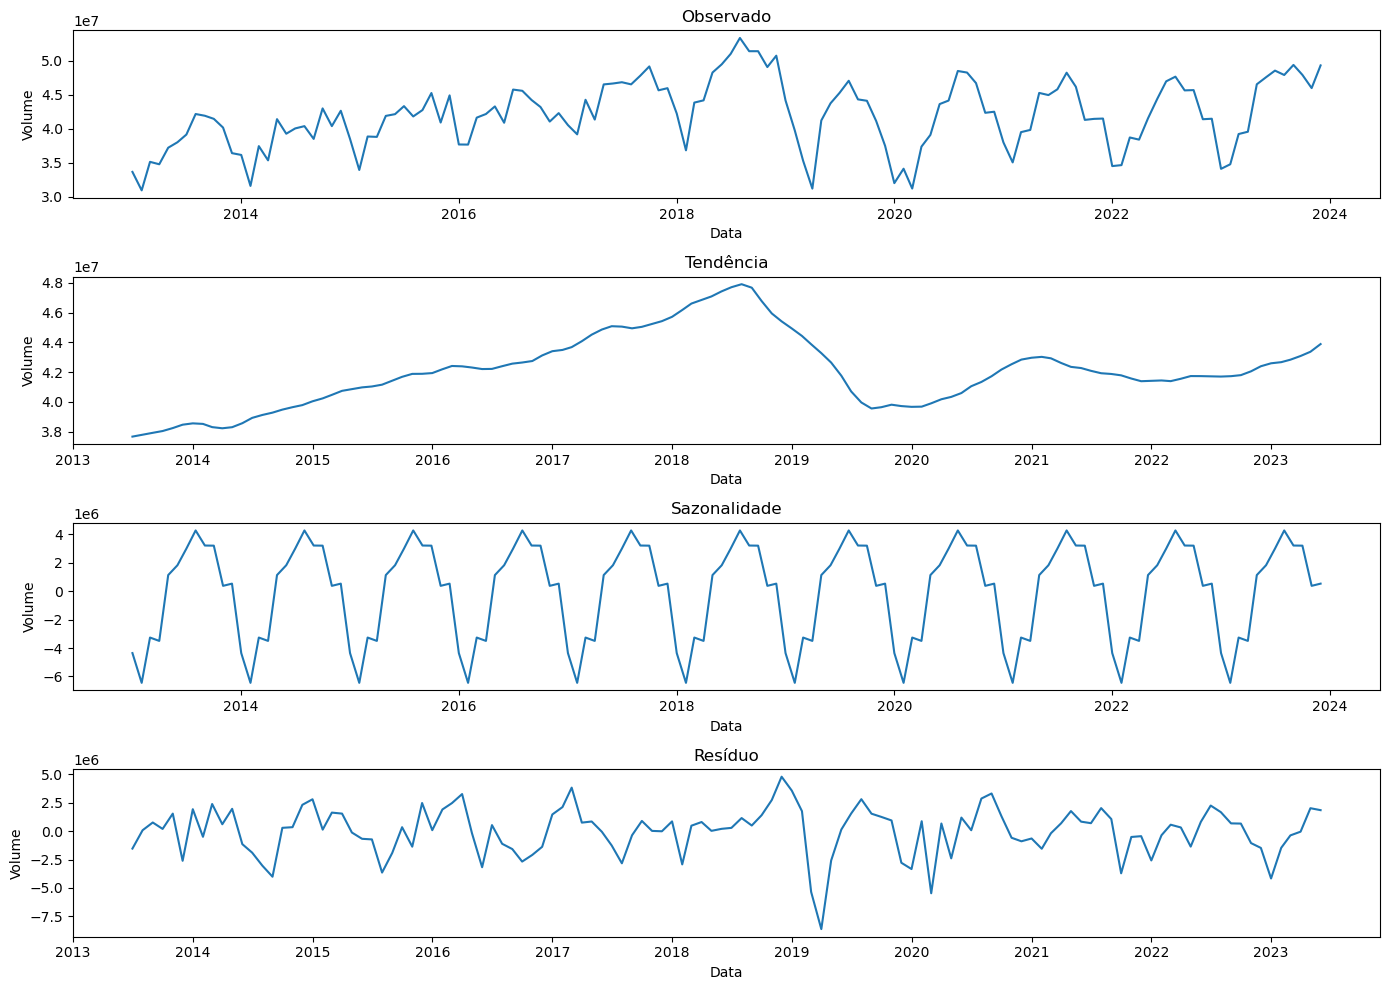

In [124]:
# Decomposição da série temporal usando STL (Seasonal-Trend decomposition using LOESS)
result = sm.tsa.seasonal_decompose(volume_por_mes_ano['Volume'], model='additive')

# Plotar os componentes
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observado')
plt.xlabel('Data')
plt.ylabel('Volume')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Tendência')
plt.xlabel('Data')
plt.ylabel('Volume')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Sazonalidade')
plt.xlabel('Data')
plt.ylabel('Volume')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Resíduo')
plt.xlabel('Data')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()

In [125]:
# Insights: 
# Gráfico 1 Observado - Este gráfico mostra os dados originais da série temporal. 
# Verifica-se um padrão de aumento de volume transportado no primeiro semestre e uma redução no segundo semestre de cada ano.
# Volume acima dos demais anos pode ser verificado em 2019.
# Gráfico 2 - Tendência - Este gráfico representa a tendência de longo prazo dos dados, suavizando as flutuações sazonais.
# Observada tendência de alta de 2013 até metade de 2018. Depois tendência de queda da metade de 2018 até início de 2020 
# com uma leve alta até 2021, nova queda até 2022 e nova tendência de alta até final de 2023.
# Gráfico 3 - Sazonalidade - Este gráfico mostra a variação sazonal ao longo do tempo, isolando padrões que se repetem em intervalos regulares.
# Nota-se sazonalidade anual constante ao longo do tempo
# Gráfico 4 - Resíduos - Este gráfico representa a diferença entre os dados observados e a soma dos componentes de tendência e sazonalidade
# Os resíduos não apresentam padrão claro indicando uma decomposição bem feita.

#### 8.7.2 - Visualizar Dados Sazonais

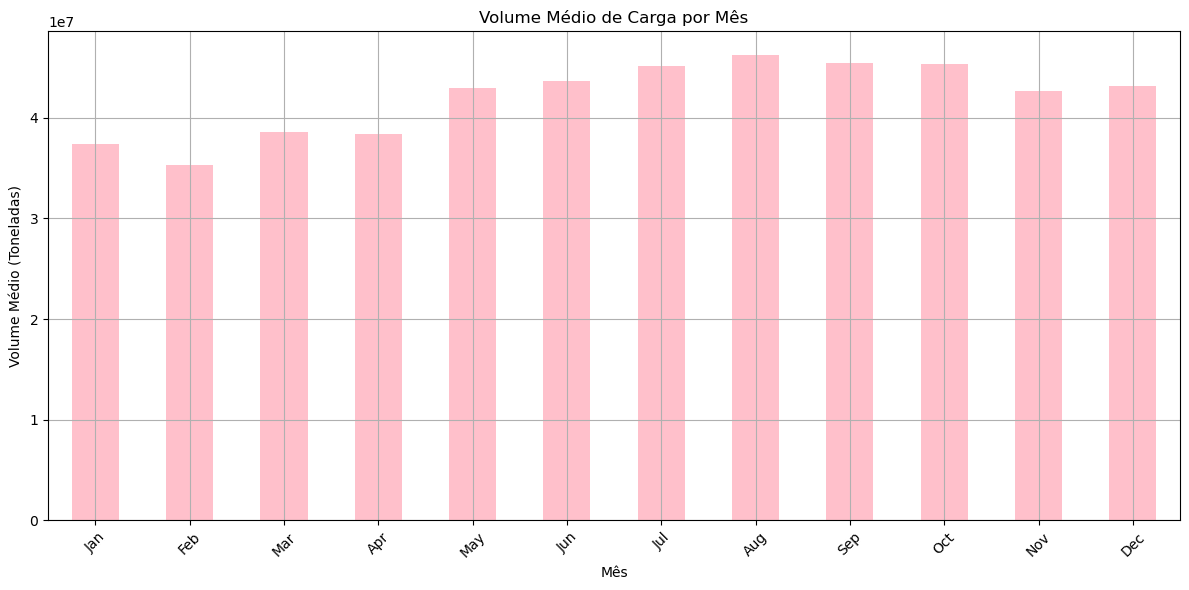

In [126]:
# Extrair o mês e calcular a média do volume por mês
volume_por_mes_ano['Month'] = volume_por_mes_ano.index.month
monthly_mean_volume = volume_por_mes_ano.groupby('Month').mean()['Volume']

# Plotar o gráfico
plt.figure(figsize=(12, 6))
monthly_mean_volume.plot(kind='bar', color='pink')

plt.title('Volume Médio de Carga por Mês')
plt.xlabel('Mês')
plt.ylabel('Volume Médio (Toneladas)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
# Insights: Meses de Julho e Agosto tem maior volume transportado. Meses de Janeiro e Fevereiro tem menor volume transportado.

# 9 - Visualização e relatórios

In [128]:
#Pergunta: Como apresentar os resultados de maneira clara e informativa para stakeholders?
#Tarefas:
#Criar dashboards interativos que incluam gráficos de tendências, mapas de rotas, e análises de eficiência.
#Desenvolver relatórios que destaquem insights principais, como oportunidades de otimização e melhorias na eficiência.
#Métodos e Ferramentas:
#Análise Exploratória de Dados (EDA): Usar bibliotecas como Pandas, NumPy, e Matplotlib/Seaborn para exploração e visualização dos dados.
#Modelagem Estatística: Aplicar técnicas estatísticas para entender padrões e correlações.
#Machine Learning (opcional): Usar algoritmos de aprendizado de máquina para prever volumes de carga futuros ou identificar padrões complexos.
#Visualização de Dados: Utilizar ferramentas como Tableau, Power BI, ou bibliotecas Python (Plotly, Bokeh) para criar visualizações interativas.
#Exemplo de Resultados a Serem Apresentados:
#Gráficos de Tendências: Volume de carga transportada ao longo do tempo, por ferrovia e mercadoria.
#Matriz de Fluxo: Frequência das rotas entre estações de origem e destino.
#Eficiência: Gráficos comparativos da eficiência entre diferentes ferrovias e mercadorias.
#Mapas: Mapas de calor mostrando a intensidade do transporte entre diferentes regiões.

# Gráficos interativos

### 9.1 - Dashboard interativo com Dash

In [129]:
# Dashboard Interativo com Código
# Dash com Python
# Dash é uma biblioteca desenvolvida pelo Plotly que permite criar dashboards interativos com Python. 
# É ideal para criar interfaces web interativas com gráficos e tabelas.

In [130]:
# Para rodar um arquivo.py no jupyter notebook, execute a estrutura desta célula e da seguinte.
# pip install jupyter-dash

In [131]:
# Caminho para o seu arquivo dash_app.py
caminho = r'C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\scripts\dash_app.py'

# Executa o script
process = subprocess.Popen(['python', caminho])

In [132]:
# Observação: como no código desenvolvido, na última linha temos app.run_server(debug=True), não mudamos a porta padrão
# A porta padrão do Dash é 8050
# Em sua máquina local digitar o local a seguir. Verificar se sua porta é realmente 8050
# http://127.0.0.1:8050/

In [133]:
# Parar o aplicativo
process.kill()

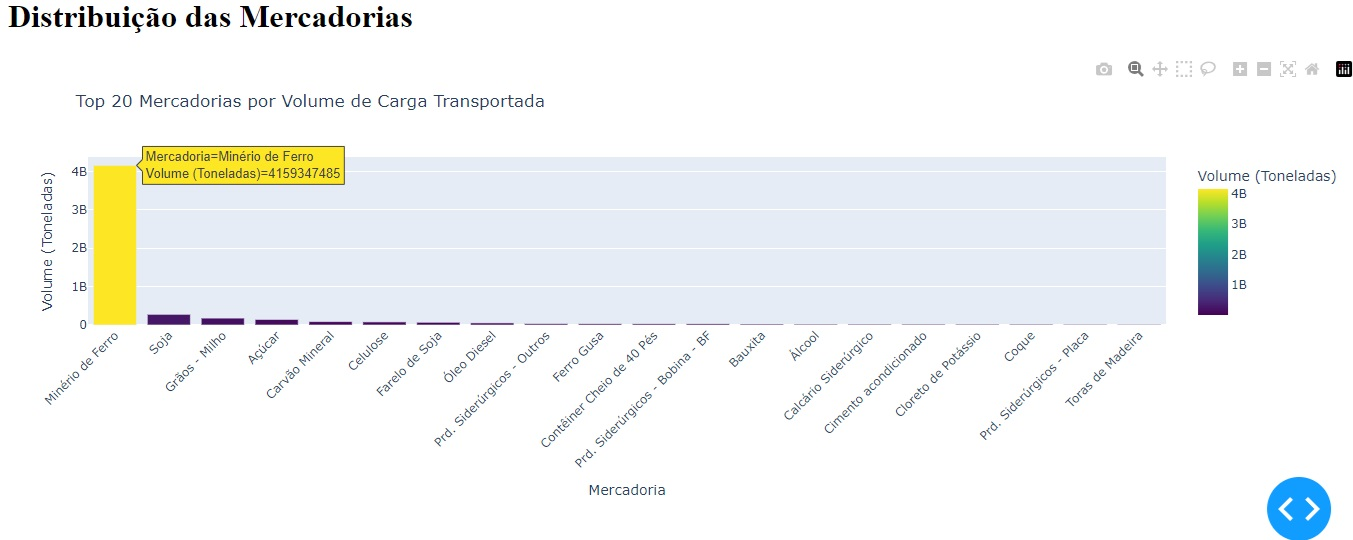

In [134]:
# imagem capturada pela página criada pelo Dash
# Caminho da imagem
image_path = r'C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\reports\figures\imagem_dash.jpg'
# Exibir a imagem
display(Image(filename=image_path))

In [135]:
# Para rodar via terminal, digite: python dash_app.py a partir da pasta onde está o arquivo

### 9.2 - Dashboard interativo com Streamlit

In [136]:
# Dashboard Interativo com Código
# Streamlit com python
# Streamlit é uma ferramenta muito fácil de usar para criar dashboards interativos e visualizações com Python.

In [137]:
# A porta padrão do Streamlit é 8501

In [138]:
# Caminho para o seu arquivo streamlit_app.py
caminho = r'C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\scripts\streamlit_app.py'

# Inicia o aplicativo Streamlit
process = subprocess.Popen(['streamlit', 'run', caminho])

In [139]:
# Parar o aplicativo
process.kill()

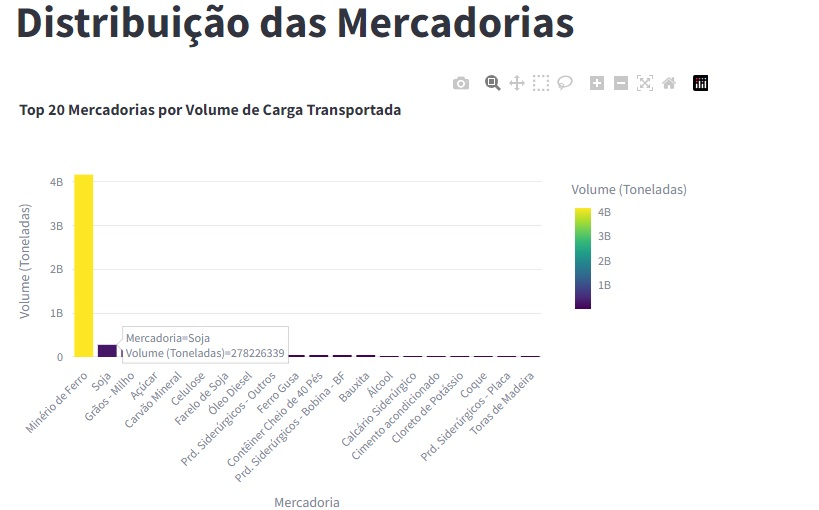

In [140]:
# imagem capturada pela página criada pelo Streamlit
# Caminho da imagem
image_path = r'C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\reports\figures\dashboard_streamlit.jpg'
# Exibir a imagem
display(Image(filename=image_path))

In [141]:
# Para executar um aplicativo Streamlit (fora do jupyter notebook), no terminal digite:
# streamlit run streamlit_app.py --server.port 8502
# abrir http:localhost/8502, se não abrir automaticamente

### 9.3 - Dashboard estático com Power BI

### Imagem gerada através do PowerBI Desktop sobre Soma de TU por ano e por Ferrovia

In [142]:
# O PowerBI Desktop somente gera arquivos .pbix ou .pdf
# Para converter .pdf em .jpg, foi utilizada a ferramenta online pdf2go.com

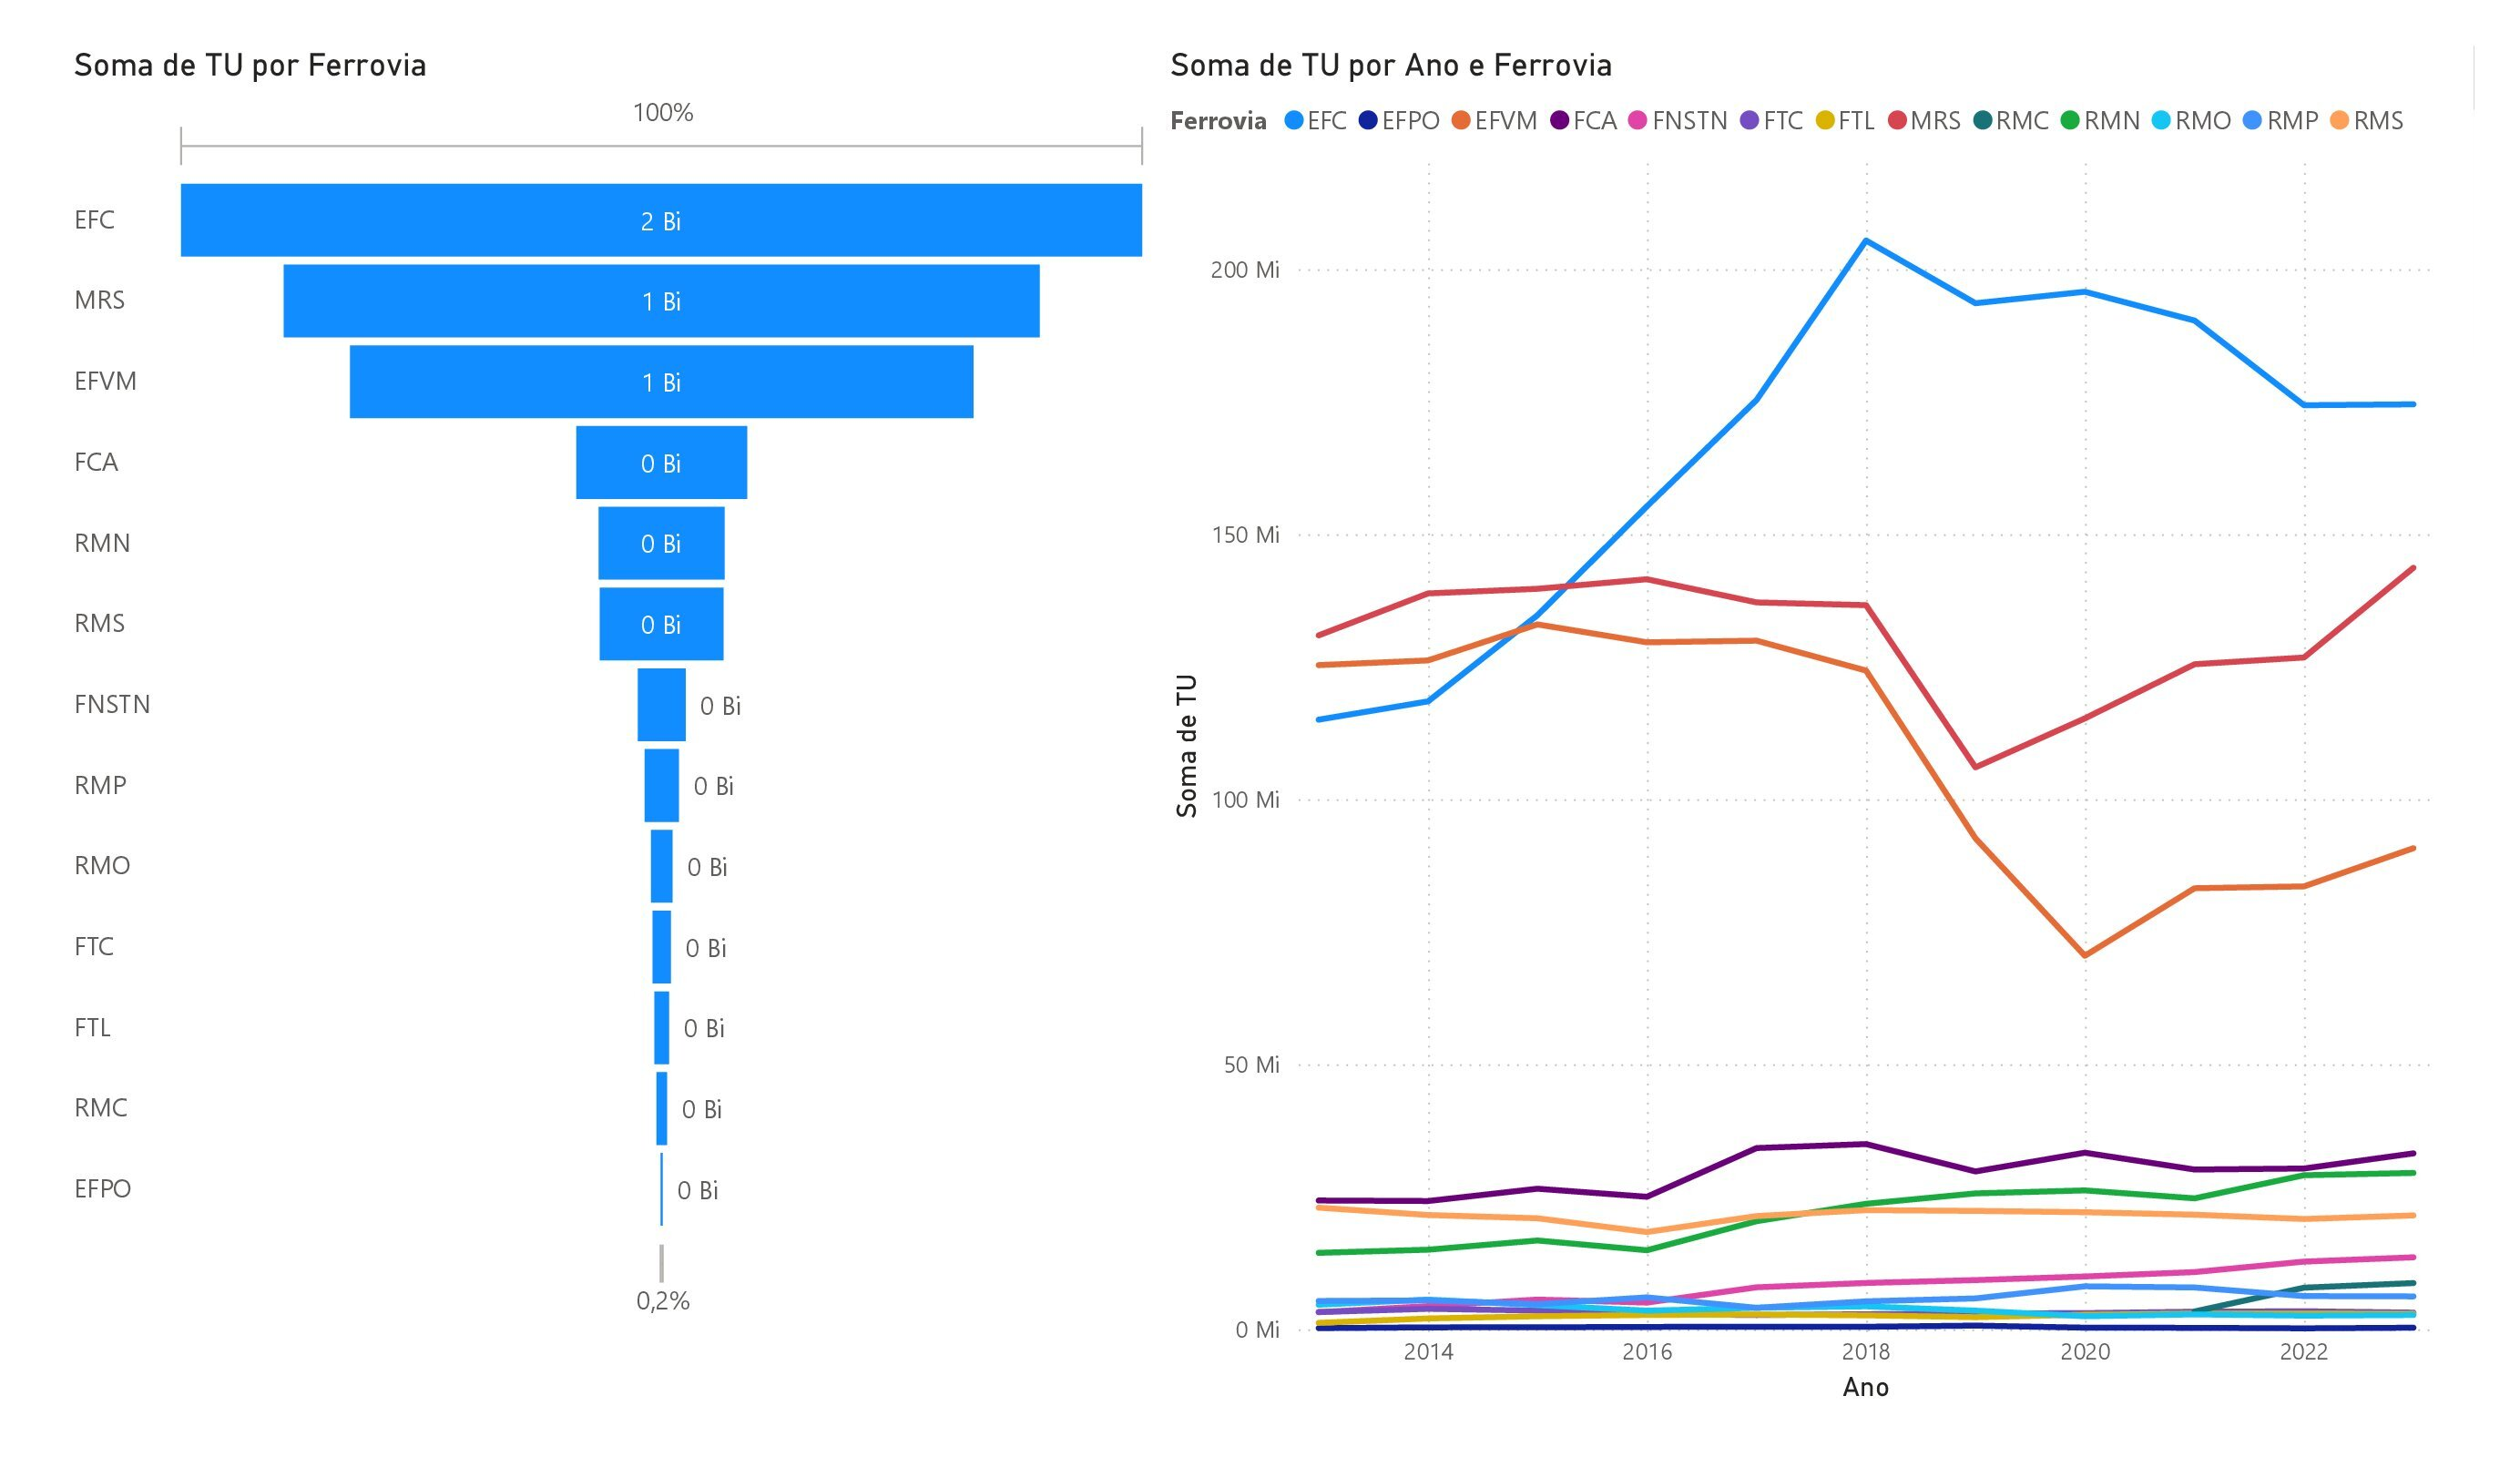

In [143]:
# Caminho da imagem
image_path = r'C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\reports\figures\ferrovia.jpg'
# Exibir a imagem
display(Image(filename=image_path))

### 9.4 - Dashboard estático com Tableau

### Imagem gerada através do Tableau Public sobre Ferrovia x TU do ano 2013

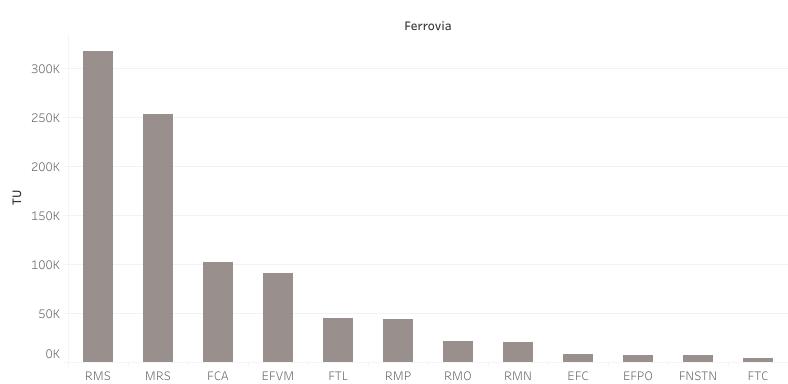

In [144]:
# Caminho da imagem
image_path = r'C:\Users\Danilo\PROJETOS\PROJETO11_FERROVIA_CARGA\reports\figures\FerroviaxTU.png'
# Exibir a imagem
display(Image(filename=image_path))

# 10 - Sugestões de melhorias

In [145]:
# Verificar como melhorar a quantidade de produtos transportados ao final e início de cada ano

# Verificar a possibilidade dos produtos que são transportados de forma mais eficiente 
# (grãos arroz, LAB - Sulfonato de alquilbenzeno linear e Farelo de Milho) terem um desconto nos preços para tentar aumentar o numero de vendas.

# As ferrovias devem inovar e melhorarem seus processos de tal forma que tenham um desempenho 
#da EFC, MRS e EFVM que são as 3 maiores ferrovias transportadoras em termos de volume